In [1]:
# Activate "amyloid" env
import sys
print(sys.executable)

/data/leuven/375/vsc37540/.conda/envs/amyloid/bin/python


## Load Amyloid Atlas and Metadata

In [3]:
from bs4 import BeautifulSoup
import requests 
import os
import pandas as pd

output_dir = "output"
url = "https://people.mbi.ucla.edu/sawaya/amyloidatlas/"

# Creating output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Fetch HTML document
def fetch_html(url):
    response = requests.get(url)
    doc = BeautifulSoup(response.text, "html.parser")
    return doc

# Parse table data from the page
def parse_table_data(doc):
    table_values = doc.find_all("td")

    headers = []
    row_data = []
    current_row = []

    for i in range(len(table_values)):
        # First row (headers): skip image columns (index 5 and 6)
        if i < 9 and i % 9 != 5 and i % 9 != 6:
            headers.append(table_values[i].get_text(strip=True))
        # Data rows
        if i >= 9 and i % 9 != 5 and i % 9 != 6:
            current_row.append(table_values[i].get_text(strip=True))
        if i > 8 and i % 9 == 8:
            row_data.append(current_row)
            current_row = []

    return headers, row_data

def save_full_dataset(df):
    output_path = os.path.join(output_dir, "full_amyloid_pdb_metadata.tsv")
    df.to_csv(output_path, sep="\t", index=False)
    print(f"✅ Saved full dataset to: {output_path}")

def main():
    try:
        doc = fetch_html(url)
        headers, rows = parse_table_data(doc)
        df = pd.DataFrame(rows, columns=headers)
        print(f"📄 Retrieved {len(df)} entries.")
        save_full_dataset(df)
    except Exception as e:
        print(f"💥 Something went wrong: {e}")

if __name__ == "__main__":
    main()

📄 Retrieved 620 entries.
✅ Saved full dataset to: output/full_amyloid_pdb_metadata.tsv


In [20]:
import pandas as pd

# Path to the TSV file
tsv_path = "output/full_amyloid_pdb_metadata.tsv"

# Read the TSV file into a DataFrame
full_amyloid_pdb_metadata = pd.read_csv(tsv_path, sep="\t")

# Filter for α-synuclein entries that used cryoEM method
amyloids = full_amyloid_pdb_metadata[
    (full_amyloid_pdb_metadata["Method"].str.contains("cryoEM", case=False))
]
# Show the first few rows
print(amyloids.head())

# Number of matched entries
print(f"\nTotal entries: {len(amyloids)}")


       Protein                                     Fibril Origins  \
0  α-synuclein                                 Human, recombinant   
2  α-synuclein  Human, recombinant, seeded from Multiple Syste...   
3  α-synuclein                    Human, H50Q mutant, recombinant   
4  α-synuclein                Human, recombinant, pH 7.0, type 1m   
5  α-synuclein                  Human, G14R mutation, recombinant   

  Residues Ordered  Method  Resol- ution (Å) PDB ID              Reference  
0            43-83  cryoEM              3.60   6cu8        Li et al., 2018  
2            36-99  cryoEM              3.18   7nck  Lövestam et al., 2021  
3            36-99  cryoEM              3.30   6peo     Boyer et al., 2019  
4     13-20,36-100  cryoEM              3.26   8pk2      Frey et al., 2024  
5     12-21,36-100  cryoEM              3.00   9hgs    Brücke et al., 2024  

Total entries: 589


In [21]:
import pandas as pd

# Path to the CSV file
csv_path = "/data/leuven/375/vsc37540/Projects/Amyloid/output/amyloid_features_stamp_db_summary.csv"

# Read the CSV file into a DataFrame
amyloid_features_stamp_db_summary = pd.read_csv(csv_path)
print(amyloid_features_stamp_db_summary.head())

# Number of matched entries
print(f"\nTotal entries: {len(amyloid_features_stamp_db_summary)}")

  Amyloid  Num Protofilaments  Avg RMSD  Avg Tilt (°)  Avg Rise (Å)  \
0    8x7p                   2  2.425178     18.385733      4.836330   
1    8ttl                   2  1.024341      3.127842      4.958150   
2    8zx6                   2  1.197191      9.361274      4.822672   
3    9ero                   2  1.346249      7.713910      4.829514   
4    7nch                   2  0.993100      8.909424      5.352078   

   Avg Twist (°)  
0       1.577194  
1       0.726187  
2       0.982153  
3       1.198286  
4       0.541418  

Total entries: 494


In [ ]:
amyloid_features_stamp_db_summary_merged = pd.merge(amyloid_features_stamp_db_summary, amyloids, left_on='Amyloid', right_on='PDB ID', how='left')

# Drop duplicate column if desired
amyloid_features_stamp_db_summary_merged.drop(columns='PDB ID', inplace=True)

amyloid_features_stamp_db_summary_merged.to_csv('/data/leuven/375/vsc37540/Projects/Amyloid/output/amyloid_features_stamp_db_summary_merged.csv', index=False)
amyloid_features_stamp_db_summary_merged

Amyloid  Num Protofilaments  Avg RMSD  Avg Tilt (°)  Avg Rise (Å)  \
0      8x7p                   2  2.425178     18.385733      4.836330   
1      8ttl                   2  1.024341      3.127842      4.958150   
2      8zx6                   2  1.197191      9.361274      4.822672   
3      9ero                   2  1.346249      7.713910      4.829514   
4      7nch                   2  0.993100      8.909424      5.352078   
..      ...                 ...       ...           ...           ...   
489    8olg                   1  2.364113     13.779083      4.683070   
490    8cz1                   2  1.524451      0.555211      4.827912   
491    8h03                   2  1.294599      8.070578      4.772243   
492    7l7h                   5  0.669587     34.900656      5.611315   
493    6qjq                   1  1.414598      1.934442      4.940739   

     Avg Twist (°)      Protein  \
0         1.577194  α-synuclein   
1         0.726187          Tau   
2         0.982153          Tau   
3         1.198286          Tau   
4         0.541418  α-synuclein   
..             ...          ...   
489       2.038631    Amyloid-β   
490       0.597051  α-synuclein   
491       1.104208  α-synuclein   
492      10.747787  α-synuclein   
493       1.183462       Tau 3R   

                                        Fibril Origins  Residues Ordered  \
0         Human, E46K mutation, recombinant, CCA-bound             45-99   
1    Human, isoform 0N4R, S202E+T205E+S208E phospho...  304-330, 351-440   
2    Human, isoform F, recombinant, heparin, polymo...           304-379   
3    Human, extracted from brain of an individual w...           305-379   
4    recombinant, seeded from Multiple System Atrop...      14-25, 36-91   
..                                                 ...               ...   
489  Human, E22G & D23N mutations, extracted from b...              1-39   
490  Human, recombinant, seeded from Dementia with ...       15-24,36-97   
491  recombinant, human, seeded from Parkinson's Di...             36-96   
492  Human, recombinant, filaments formed in the pr...             37-79   
493                       recombinant, Heparin Induced   272-274,306-330   

     Method  Resol- ution (Å)                       Reference  
0    cryoEM              2.70                Liu et al., 2024  
1    cryoEM              2.60            Mammeri et al., 2024  
2    cryoEM              3.50    Tao et al., 2024 unpublished  
3    cryoEM              2.90                 Qi et al., 2024  
4    cryoEM              3.84           Lövestam et al., 2021  
..      ...               ...                             ...  
489  cryoEM              4.20          Zielinski et al., 2023  
490  cryoEM              3.00  Sokratian et al., 2023 BioRxiv  
491  cryoEM              2.80                Fan et al., 2023  
492  cryoEM              4.00          Hojjatian et al., 2021  
493  cryoEM              3.50              Zhang et al., 2019  

[494 rows x 12 columns]

In [24]:
amyloid_features_stamp_db_summary[amyloid_features_stamp_db_summary["Amyloid"]=="2beg"]

Amyloid  Num Protofilaments  Avg RMSD  Avg Tilt (°)  Avg Rise (Å)  \
335    2beg                   1  0.472356     20.449301      4.583878   

     Avg Twist (°)  
335       1.152202

In [26]:
amyloids[amyloids["PDB ID"]=="2beg"]

Empty DataFrame
Columns: [Protein, Fibril Origins, Residues Ordered, Method, Resol- ution (Å), PDB ID, Reference]
Index: []

In [38]:
import os
import requests
import pandas as pd
from pathlib import Path

def download_pdb_files(pdb_ids, output_folder):
    """Download PDB files for a list of PDB IDs to a specified folder."""
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"Directory '{output_folder}' created successfully.")
    else:
        print(f"Directory '{output_folder}' already exists.")

    for pdb_id in pdb_ids:
        url = f'https://files.rcsb.org/download/{pdb_id}.pdb'
        response = requests.get(url)
        
        if response.status_code == 200:
            file_path = os.path.join(output_folder, f'{pdb_id}.pdb')
            with open(file_path, 'w') as f:
                f.write(response.text)
        else:
            print(f'Failed to retrieve the PDB file for {pdb_id}.')

# # First dataset (assuming 'data' is already defined)
# output_folder = "/scratch/leuven/375/vsc37540/Projects/Amyloid/pdb_files"
# # output_folder = "/data/leuven/375/vsc37540/Projects/Amyloid/output/pdb_files/syn"
# download_pdb_files(amyloids["PDB ID"], output_folder)

## Process PDB files

In [ ]:
import Bio
from Bio.PDB import PDBParser, DSSP

def run_dssp(pdb_path):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein", pdb_path)
    model = structure[0]  # DSSP needs a specific model
    dssp = DSSP(model, pdb_path, dssp="/data/leuven/375/vsc37540/.conda/envs/dssp/bin/mkdssp" )  # Runs mkdssp
    return dssp

def get_sheet_residues_from_dssp(dssp):
    sheet_residues = {}  # {chain: [(residue_index), ...]}

    for key, dssp_data in dssp.property_dict.items():
        chain, res_id = key
        ss = dssp_data[1]  # Secondary structure code (B, E, H, etc.)

        if ss in ('B', 'E'):  # β-strand
            if chain not in sheet_residues:
                sheet_residues[chain] = []
            sheet_residues[chain].append(res_id[1])  # residue number

    return sheet_residues

def parse_sheets_with_dssp(pdb_path):
    dssp = run_dssp(pdb_path)
    return get_sheet_residues_from_dssp(dssp)

pdb_path = "/data/leuven/375/vsc37540/Projects/Amyloid/stamp_db/2beg_Repair.pdb"
test = parse_sheets_with_dssp(pdb_path)

In [109]:
import json
with open("/data/leuven/375/vsc37540/Projects/Amyloid/beta_sheet_ranges.json", "r") as f:
    beta_sheets_by_file = json.load(f)

beta_sheets_by_file

{'7da4.pdb': {},
 '6jpd.pdb': {'A': ['8-10', '16-17'],
  'B': ['8-10', '16-17'],
  'C': ['8-10', '16-17'],
  'D': ['8-10', '16-17'],
  'E': ['8-10', '16-17'],
  'F': ['8-10', '16-17'],
  'G': ['8-10', '16-17'],
  'H': ['8-10', '16-17'],
  'I': ['8-10', '16-17'],
  'J': ['8-10', '16-17']},
 '7m61.pdb': {'G': ['14-15', '35-36'],
  'H': ['23-25'],
  'A': ['14-15', '35-36'],
  'B': ['23-25'],
  'C': ['14-15', '35-36'],
  'D': ['23-25'],
  'E': ['14-15', '35-36'],
  'F': ['23-25'],
  'I': ['14-15', '35-36'],
  'J': ['23-25'],
  'O': ['14-15', '35-36'],
  'P': ['23-25'],
  'K': ['14-15', '35-36'],
  'L': ['23-25'],
  'M': ['14-15', '35-36'],
  'N': ['23-25'],
  'Q': ['14-15', '35-36'],
  'R': ['23-25'],
  'S': ['14-15', '35-36'],
  'T': ['23-25']},
 '7qkz.pdb': {'b': ['308-310', '313-314'],
  'c': ['308-310', '313-314'],
  'd': ['308-310', '313-314'],
  'P': ['308-310', '313-314'],
  'S': ['308-310', '313-314'],
  'Q': ['308-310', '313-314'],
  'T': ['308-310', '313-314'],
  'R': ['308-310',

In [110]:
from MDAnalysis import Universe
import numpy as np
import os
from sklearn.cluster import DBSCAN
from itertools import combinations

# def parse_sheet_residues(pdb_path):
#     """ Parse SHEET regions from the PDB file"""
#     sheet_residues = {}
#     with open(pdb_path, 'r') as f:
#         for line in f:
#             if line.startswith("SHEET"):
#                 sheet_name = line[11:14].strip()  # Extract the sheet name (e.g., AA1, AA2)
#                 chain = line[21]
#                 start = int(line[22:26])
#                 end = int(line[33:37])
#                 # Add the sheet name, chain, and residue range to the dictionary
#                 if sheet_name not in sheet_residues:
#                     sheet_residues[sheet_name] = {}
#                 if chain not in sheet_residues[sheet_name]:
#                     sheet_residues[sheet_name][chain] = []
#                 sheet_residues[sheet_name][chain].append((start, end))
#     return sheet_residues

def compute_chain_center(bb_atoms):
    """Computes the center of mass for backbone atoms."""
    return bb_atoms.center_of_mass() if len(bb_atoms) > 0 else None

def cluster_protofilaments(u, pdb_id, eps=11, min_samples=2):   
    """
    Cluster chains into protofilaments based on centers of mass of backbone atoms in β-strand regions.
    Compatible with parse_sheet_residues structured by sheets and chains.
    """
    chains = list(set(res.segid for res in u.select_atoms("protein").residues))
    coms, valid_ids = [], []

    sheet_chains = beta_sheets_by_file.get(f"{pdb_id}.pdb", {})

    for chain in chains:
        ranges = sheet_chains.get(chain, [])
        if not ranges:
            continue

        # Build selection string
        sel_strs = []
        for r in ranges:
            start, end = map(int, r.split("-"))
            sel_strs.append(f"(resid {start} to {end})")
        sel_str = " or ".join(sel_strs)

        bb = u.select_atoms(f"name CA and segid {chain} and ({sel_str})")
        if len(bb) == 0:
            continue

        com = bb.center_of_mass()
        coms.append(com)
        valid_ids.append(chain)

    if not coms:
        return None  # no β-strands found

    labels = DBSCAN(eps=eps, min_samples=min_samples).fit(np.array(coms)).labels_

    clusters = {}
    for cid, lbl in zip(valid_ids, labels):
        if lbl != -1:
            clusters.setdefault(f"PF{lbl+1}", []).append(cid)

    return clusters

from sklearn.decomposition import PCA

def save_protofilaments_to_pdb(u, protofilaments, pdb_id, output_dir_full="protofilaments/full", output_dir_individual="protofilaments/individual"):
    os.makedirs(output_dir_full, exist_ok=True)
    os.makedirs(output_dir_individual, exist_ok=True)
    pf_names = list(protofilaments.keys())
    num_pfs = len(pf_names)

    if num_pfs >= 0:
        print(f"ℹ️ {pdb_id} has {num_pfs} protofilaments — saving individual + all combined")

        # === Save each individual protofilament ===
        for idx, pf in enumerate(pf_names, start=1):
            chain_ids = protofilaments[pf]
            sel_str = " or ".join([f"segid {cid}" for cid in chain_ids])
            atoms = u.select_atoms(sel_str)

            if len(atoms) == 0:
                print(f"⚠️ No atoms found for protofilament {pf}. Skipping.")
                continue

            out_path = os.path.join(output_dir_individual, f"{pdb_id}_{idx}.pdb")
            atoms.write(out_path)
            print(f"✅ Saved protofilament {pf} to {out_path}")

        # === Save full amyloid as combo 1_2_3_..._N ===
        all_chain_ids = [cid for chains in protofilaments.values() for cid in chains]
        sel_str = " or ".join([f"segid {cid}" for cid in all_chain_ids])
        atoms = u.select_atoms(sel_str)

        if len(atoms) > 0:
            combo_suffix = "_".join(str(i + 1) for i in range(num_pfs))
            out_path = os.path.join(output_dir_full, f"{pdb_id}_{combo_suffix}.pdb")
            atoms.write(out_path)
            print(f"✅ Saved full amyloid as {combo_suffix} to {out_path}")
        else:
            print("⚠️ No atoms found for full amyloid.")

    # else:
    #     print(f"ℹ️ {pdb_id} has {num_pfs} protofilaments — saving all combinations")

    #     # === Save all non-empty combinations ===
    #     for k in range(1, num_pfs + 1):
    #         for idx, combo in enumerate(combinations(pf_names, k), start=1):
    #             combined_chains = []
    #             for pf in combo:
    #                 combined_chains.extend(protofilaments[pf])

    #             sel_str = " or ".join([f"segid {cid}" for cid in combined_chains])
    #             atoms = u.select_atoms(sel_str)
    #             if len(atoms) == 0:
    #                 print(f"⚠️ No atoms found for combo {combo}. Skipping.")
    #                 continue

    #             combo_suffix = "_".join(str(pf_names.index(pf) + 1) for pf in combo)
    #             out_path = os.path.join(output_dir, f"{pdb_id}_{combo_suffix}.pdb")
    #             atoms.write(out_path)
    #             print(f"✅ Saved combination {combo} to {out_path}")

def process_all_pdbs(input_folder, output_base="protofilaments"):
    """Process all PDB files in the input folder and extract protofilaments."""
    os.makedirs(output_base, exist_ok=True)

    pdb_files = [f for f in os.listdir(input_folder) if f.lower().endswith(".pdb")]
    if not pdb_files:
        print(f"⚠️ No PDB files found in {input_folder}")
        return
    
    failed_pdbs = []

    for filename in pdb_files:
        pdb_path = os.path.join(input_folder, filename)
        pdb_id = os.path.splitext(filename)[0]
        print(f"\n📦 Processing {filename}...")

        try:
            u = Universe(pdb_path)
            protofilaments = cluster_protofilaments(u, pdb_id)
            if not protofilaments:
                print(f"   ⚠️ {pdb_id}: No protofilaments found.")
                failed_pdbs.append(pdb_id)
                continue

            for pf, chains in protofilaments.items():
                print(f"   - {pf}: {chains}")

            out_full = os.path.join(output_base, "full")
            out_individual = os.path.join(output_base, "individual")

            save_protofilaments_to_pdb(u, protofilaments, pdb_id, out_full, out_individual)

        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")
            failed_pdbs.append(pdb_id)
            continue

    if failed_pdbs:
        print("\n⚠️ The following PDBs failed to save protofilaments:")
        for f in failed_pdbs:
            print(f"  - {f}")
    else:
        print("\n✅ All PDBs processed successfully.")
    
    return failed_pdbs


# # # === Example usage ===
# input_folder = "/data/leuven/375/vsc37540/Projects/Amyloid/stamp_db/stamp_b_factor_residue_pdbs_corrected"
# output_base = "/data/leuven/375/vsc37540/Projects/Amyloid/stamp_db"

# os.makedirs(output_base, exist_ok=True)

# # Process all PDB files in the input folder 
# failed_pdbs = process_all_pdbs(input_folder, output_base)

In [34]:
failed_pdbs

['6gx5', '7da4', '8bqw']

In [21]:
import os
import plotly.graph_objects as go
from MDAnalysis import Universe
from itertools import cycle

# Define a color palette
COLORS = cycle([
    "red", "blue", "green", "purple", "orange", "brown", "cyan", "magenta", "lime", "gold"
])

def visualize_separate_protofilaments(pdb_files):
    fig = go.Figure()

    for pdb_path, color in zip(pdb_files, COLORS):
        pdb_name = os.path.basename(pdb_path)

        try:
            u = Universe(pdb_path)
            atoms = u.select_atoms("name CA")  # use backbone CA atoms for clarity
            coords = atoms.positions

            fig.add_trace(go.Scatter3d(
                x=coords[:, 0], y=coords[:, 1], z=coords[:, 2],
                mode='markers',
                marker=dict(size=4, color=color),
                name=pdb_name
            ))
        except Exception as e:
            print(f"❌ Failed to load {pdb_path}: {e}")

    fig.update_layout(
        title="Protofilament Visualization",
        scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
        margin=dict(l=0, r=0, t=40, b=0),
        showlegend=True
    )

    fig.show()

# Choose protofilament files for one PDB ID
pdb_id = "5o3l"
protofilament_folder = "output/protofilaments/tau"
pdb_files = [
    os.path.join(protofilament_folder, f"{pdb_id}_1.pdb"),
    os.path.join(protofilament_folder, f"{pdb_id}_2.pdb")
]

visualize_separate_protofilaments(pdb_files)

/data/leuven/375/vsc37540/.conda/envs/amyloid/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning:

1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.



## US-align for structural similarity

!!!! Now still US-align Oligomer. Maybe change to monomer

In [ ]:
### run_usalign.sh ###

In [ ]:
import subprocess
import os

# === MODIFY THESE PATHS ===
USALIGN_EXEC = "/staging/leuven/stg_00185/USalign/USalign" # Path to USalign binary
pdb1 = "/data/leuven/375/vsc37540/Projects/Amyloid/stamp_db/individual/2lmo_2.pdb" # Full path to first PDB file
pdb2 = "/data/leuven/375/vsc37540/Projects/Amyloid/stamp_db/individual/6n3a_3.pdb" # Full path to second PDB file
output_file = "/data/leuven/375/vsc37540/Projects/Amyloid/output/US_align_results/result3.txt" # Where to save the output

# Create output directory if needed
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Build command
cmd = [USALIGN_EXEC, "-mm", "1", "-ter", "0", "-TMscore", "0", pdb1, pdb2, "-o", "/data/leuven/375/vsc37540/Projects/Amyloid/output/US_align_results/sup3"]

# Run alignment
try:
    with open(output_file, "w") as out:
        subprocess.run(cmd, stdout=out, stderr=subprocess.STDOUT, check=True)
        print(f"✅ Alignment complete! Output saved to:\n {output_file}")
except subprocess.CalledProcessError as e:
    print(f"❌ Alignment failed: {e}")


✅ Alignment complete! Output saved to:
 /data/leuven/375/vsc37540/Projects/Amyloid/output/US_align_results/result3.txt


In [4]:
# Count US-align results
import os

folder_path = "/scratch/leuven/375/vsc37540/Projects/Amyloid/stamp_db/USalign_results"
num_files = len([
    f for f in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, f))
])

print(f"Number of files: {num_files}")

Number of files: 468028


In [18]:
with open("/scratch/leuven/375/vsc37540/Projects/Amyloid/stamp_db/USalign_results/6n37_2_vs_7q66_2.txt", "r") as file:
    content = file.read()
print(content)


 ********************************************************************
 * US-align (Version 20241108)                                      *
 * Universal Structure Alignment of Proteins and Nucleic Acids      *
 * Reference: C Zhang, M Shine, AM Pyle, Y Zhang. (2022) Nat Methods*
 *            C Zhang, AM Pyle (2022) iScience.                     *
 * Please email comments and suggestions to zhang@zhanggroup.org    *
 ********************************************************************

Name of Structure_1: /data/leuven/375/vsc37540/Projects/Amyloid/stamp_db/individual/6n37_2.pdb:1,F:1,H:1,D:1,J:1,B:1,N:1,P:1,L:1,R:1,T (to be superimposed onto Structure_2)
Name of Structure_2: /data/leuven/375/vsc37540/Projects/Amyloid/stamp_db/individual/7q66_2.pdb:1,P:1,N:1,R:1,L:1,T:1,H:1,F:1,J:1,D:1,B
Length of Structure_1: 360 residues
Length of Structure_2: 250 residues

Aligned length= 250, RMSD=   2.43, Seq_ID=n_identical/n_aligned= 0.040
TM-score= 0.62362 (normalized by length of Structure_1: 

In [1]:
import os
import re
from collections import defaultdict

# === CONFIG ===
base_dir = "/scratch/leuven/375/vsc37540/Projects/Amyloid/stamp_db/USalign_results/"
threshold = 0.6  # TM-score threshold

# === Collect .txt files ===
filenames = [os.path.join(base_dir, f) for f in os.listdir(base_dir) if f.endswith(".txt")]

# === Parse TM-scores ===
tmscores = {}  # (pdb1_proto, pdb2_proto) -> tm_score

for filepath in filenames:
    with open(filepath) as f:
        content = f.read()

    filename = os.path.basename(filepath)
    matches = re.findall(r"TM-score=\s*([\d.]+) \(normalized by length of Structure_\d", content)
    if len(matches) == 2:
        tm1, tm2 = map(float, matches)
        tm_max = max(tm1, tm2)
        tm_min = min(tm1, tm2)
        tm = tm_min  # weighted average

        if tm >= threshold:
            pdb1, pdb2 = filename.replace(".txt", "").split("_vs_")
            tmscores[(pdb1, pdb2)] = tm

# === Group protofilaments by PDB ===
# Example: "5o3l_1" -> pdb="5o3l", proto=1
def parse_pdb_proto(name):
    parts = name.split("_")
    return parts[0], int(parts[1]) if len(parts) > 1 else None

# Group which protofilaments exist for each PDB
pdb_to_protos = defaultdict(set)
for pdb1p, pdb2p in tmscores.keys():
    pdb1, proto1 = parse_pdb_proto(pdb1p)
    pdb2, proto2 = parse_pdb_proto(pdb2p)
    pdb_to_protos[pdb1].add(proto1)
    pdb_to_protos[pdb2].add(proto2)

# === Compute edges between PDBs ===
edges = defaultdict(float)

# Count how many protofilaments from pdb1 match pdb2
pdb_pair_matches = defaultdict(set)

for (pdb1p, pdb2p), tm in tmscores.items():
    pdb1, proto1 = parse_pdb_proto(pdb1p)
    pdb2, proto2 = parse_pdb_proto(pdb2p)
    pdb_pair_matches[(pdb1, pdb2)].add(proto1)
    pdb_pair_matches[(pdb2, pdb1)].add(proto2)

# Compute edge weights (ratio of matching protofilaments)
for (pdb1, pdb2), matching_protos in pdb_pair_matches.items():
    # skip self-loops (same PDB)
    if pdb1 == pdb2:
        continue
    
    # (pdb1 → pdb2)
    total_protos = len(pdb_to_protos[pdb1])
    if total_protos > 0:
        weight = len(matching_protos) / total_protos
        edges[(pdb1, pdb2)] = weight

# === Output ===
print(f"\nEdges between PDBs (threshold = {threshold}):")
for (pdb1, pdb2), weight in sorted(edges.items()):
    print(f"{pdb1} -> {pdb2}: {weight:.2f}")


Edges between PDBs (threshold = 0.6):
2beg -> 2mpz: 1.00
2beg -> 2nnt: 1.00
2beg -> 6n37: 1.00
2beg -> 6n3b: 1.00
2beg -> 6ti5: 1.00
2beg -> 6ti6: 1.00
2beg -> 6ti7: 1.00
2beg -> 6vps: 1.00
2beg -> 6zrf: 1.00
2beg -> 6zrq: 1.00
2beg -> 7m61: 1.00
2beg -> 7m64: 1.00
2beg -> 7m65: 1.00
2beg -> 7q4m: 1.00
2beg -> 7q64: 1.00
2beg -> 7q66: 1.00
2beg -> 7yat: 1.00
2beg -> 8awt: 1.00
2beg -> 8az1: 1.00
2beg -> 8az2: 1.00
2beg -> 8azt: 1.00
2beg -> 8bfz: 1.00
2beg -> 8kf3: 1.00
2beg -> 8ol2: 1.00
2beg -> 8ol3: 1.00
2beg -> 8ol5: 1.00
2beg -> 8ol6: 1.00
2beg -> 8olo: 1.00
2beg -> 8otf: 1.00
2beg -> 8r4i: 1.00
2beg -> 9c1u: 1.00
2beg -> 9for: 1.00
2e8d -> 2mpz: 1.00
2e8d -> 6y1a: 1.00
2e8d -> 6zrf: 1.00
2e8d -> 6zrq: 1.00
2e8d -> 7m61: 1.00
2e8d -> 7m64: 1.00
2e8d -> 8r4i: 1.00
2e8d -> 9c1u: 1.00
2lmn -> 2lmp: 1.00
2lmn -> 9c1u: 0.50
2lmo -> 2lmq: 1.00
2lmo -> 2nnt: 0.50
2lmo -> 6n37: 0.50
2lmo -> 6n3b: 0.50
2lmo -> 6ti5: 1.00
2lmo -> 6ti6: 0.50
2lmo -> 6ti7: 0.50
2lmo -> 6vps: 0.50
2lmp -> 2lm

## Construct similarity graph with Leiden community detection

In [2]:
pdb_pair_matches[('7q66', '6n37')]

{2}

In [3]:
pdb_pair_matches[('6n37', '7q66')]

{1, 2}

In [14]:
edges[('7q66', '6n37')]

0.5

In [5]:
edges[('6n37', '7q66')]

1.0

In [33]:
pdb_to_protos

defaultdict(set,
            {'7nci': {1, 2},
             '7ozh': {1, 2},
             '7nrs': {1, 2},
             '7nrt': {1, 2},
             '6osm': {1, 2},
             '7xo0': {1, 2},
             '7qwg': {1},
             '7sas': {1, 2},
             '8q8y': {1, 2},
             '9cgx': {1, 2},
             '8hzb': {1, 2},
             '9ewv': {1, 2},
             '7mkf': {1, 2},
             '8qjj': {1, 2},
             '8q8f': {1, 2},
             '9ero': {1, 2},
             '6pes': {1, 2},
             '8ceb': {1, 2},
             '7qk1': {1, 2},
             '7ynq': {1, 2},
             '6cu7': {1, 2},
             '6xyp': {1, 2},
             '8cyt': {1, 2},
             '8rrr': {1, 2},
             '7ncj': {1, 2},
             '7v4b': {1, 2},
             '7qjw': {1, 2},
             '9bbm': {1, 2},
             '7yat': {1, 2, 3, 5},
             '8bfz': {1, 2},
             '8q9m': {1, 2},
             '9h5g': {1, 2},
             '7uak': {1, 2},
             '7yno': {1

In [89]:
edges

defaultdict(float,
            {('7nci', '7ozh'): 1.0,
             ('7nrs', '7nrt'): 1.0,
             ('7qwg', '7sas'): 1.0,
             ('7mkf', '8qjj'): 1.0,
             ('6pes', '8ceb'): 1.0,
             ('7nrt', '7qk1'): 1.0,
             ('6pes', '7ynq'): 1.0,
             ('6zrq', '8olq'): 1.0,
             ('6cu7', '6xyp'): 1.0,
             ('8cyt', '8rrr'): 1.0,
             ('7ncj', '7v4b'): 1.0,
             ('7qjw', '9bbm'): 1.0,
             ('7yat', '8bfz'): 0.2,
             ('8q9m', '9h5g'): 1.0,
             ('7uak', '7yno'): 1.0,
             ('8kf4', '8ol7'): 1.0,
             ('7nci', '8rrr'): 1.0,
             ('7yns', '8h05'): 1.0,
             ('8azu', '9ero'): 1.0,
             ('6cu8', '7nrx'): 1.0,
             ('7qkw', '8e7h'): 0.5,
             ('8q7f', '8q99'): 1.0,
             ('5o3o', '7qkk'): 1.0,
             ('7ynp', '8hzb'): 1.0,
             ('5o3o', '9bxo'): 1.0,
             ('7nrt', '8q8m'): 1.0,
             ('5o3t', '7nrt'): 1.0,
         

In [27]:
import os
import csv
import networkx as nx
import igraph as ig
import leidenalg

# === CONFIG ===
output_dir = "/data/leuven/375/vsc37540/Projects/Amyloid/output/cosmograph_data"
os.makedirs(output_dir, exist_ok=True)

# === Color mapping based on protofilament count ===
pf_colors = {
    1: "#1f77b4",  # blue
    2: "#2ca02c",  # green
    3: "#ff7f0e",  # orange
    4: "#d62728",  # red
    5: "#9467bd",  # purple
}

def count_protofilaments(name):
    """Count number of protofilaments"""
    return max(pdb_to_protos.get(name, {0}))

# === Collect unique nodes ===
nodes = sorted(set(pdb_to_protos.keys()))

# === Write NODES CSV ===
with open(os.path.join(output_dir, "nodes_individual_stamp_db_min.csv"), "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["id", "label", "color"])

    for name in nodes:
        pf_count = count_protofilaments(name)
        color = pf_colors.get(pf_count, "#7f7f7f")  # default gray
        writer.writerow([name, name, color])

# === Write EDGES CSV ===
with open(os.path.join(output_dir, "edges_individual_stamp_db_min.csv"), "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["source", "target", "weight"])

    for (pdb1, pdb2), weight in edges.items():
        writer.writerow([pdb1, pdb2, weight])

    # Add self-edges for all nodes with weight 1
    for node in nodes:
        writer.writerow([node, node, 1])


In [28]:
import igraph as ig
import leidenalg
import csv
import colorsys
from collections import Counter

# Load edges
edges = []
weights = []

with open("/data/leuven/375/vsc37540/Projects/Amyloid/output/cosmograph_data/edges_individual_stamp_db_min.csv", "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        edges.append((row["source"], row["target"]))
        weights.append(float(row["weight"]))

# Load node list
with open("/data/leuven/375/vsc37540/Projects/Amyloid/output/cosmograph_data/nodes_individual_stamp_db_min.csv", "r") as f:
    reader = csv.DictReader(f)
    node_data = list(reader)
    nodes = [row["id"] for row in node_data]

# Build graph
g = ig.Graph()
g.add_vertices(nodes)
g.add_edges(edges)
g.es["weight"] = weights

# Run Leiden algorithm
partition = leidenalg.find_partition(g, leidenalg.RBConfigurationVertexPartition, weights=g.es["weight"], resolution_parameter = 1.0)

# Count nodes per cluster
membership = partition.membership
cluster_sizes = Counter(membership)

# Identify valid clusters (size ≥ 3)
valid_clusters = {cid for cid, size in cluster_sizes.items() if size >= 0}
valid_cluster_ids = sorted(valid_clusters)

# Assign new cluster indices only to valid ones
cluster_id_map = {old: new for new, old in enumerate(valid_cluster_ids)}

# Generate distinct hex colors
def generate_colors(n):
    return [
        '#{:02x}{:02x}{:02x}'.format(*[int(c * 255) for c in colorsys.hsv_to_rgb(i / n, 0.6, 0.9)])
        for i in range(n)
    ]

cluster_colors = generate_colors(len(valid_clusters))

# Add cluster info and color
for i, row in enumerate(node_data):
    orig_cluster = membership[i]
    if orig_cluster in valid_clusters:
        new_cluster_id = cluster_id_map[orig_cluster]
        row["cluster"] = int(new_cluster_id)
        row["cluster_color"] = cluster_colors[new_cluster_id]
    else:
        row["cluster"] = -1  # unclustered
        row["cluster_color"] = "#7f7f7f"  # gray for unclustered


# Write to CSV
with open("/data/leuven/375/vsc37540/Projects/Amyloid/output/cosmograph_data/nodes_with_clusters_stamp_db_min.csv", "w", newline='') as f:
    fieldnames = list(node_data[0].keys())
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(node_data)


**Isolated nodes are not shown in Cosmograph!!!!!!**

In [31]:
print(partition)

Clustering with 487 elements and 16 clusters
[ 0] 2beg, 2e8d, 2lmn, 2lmo, 2lmp, 2lmq, 2m4j, 2mpz, 2mvx, 2mxu, 2nao, 2nnt,
     5kk3, 5oqv, 6cu8, 6gk3, 6jpd, 6l1t, 6mst, 6n37, 6n3a, 6n3b, 6n3c, 6qjh,
     6qjm, 6qjp, 6shs, 6ti5, 6ti6, 6ti7, 6tub, 6uur, 6vps, 6vw2, 6w0o, 6wqk,
     6xfm, 6y1a, 6zcf, 6zcg, 6zrf, 6zrq, 6zrr, 7bx7, 7dac, 7dwv, 7f29, 7lc9,
     7m61, 7m62, 7m64, 7m65, 7q4b, 7q4m, 7q64, 7q65, 7q66, 7q67, 7qk6, 7qkf,
     7qkg, 7qkh, 7qkw, 7sp1, 7yat, 7ykw, 7yl0, 7yl3, 7yl7, 7ypg, 7zky, 8awt,
     8az0, 8az1, 8az2, 8az3, 8az4, 8az5, 8az6, 8az7, 8azt, 8bfa, 8bfb, 8bfz,
     8bg0, 8bg9, 8ci8, 8du2, 8duw, 8ec7, 8ezd, 8ff2, 8ff3, 8hia, 8j47, 8jey,
     8kew, 8kf1, 8kf3, 8kf4, 8kf5, 8kf6, 8ol2, 8ol3, 8ol5, 8ol6, 8ol7, 8olg,
     8oln, 8olo, 8olq, 8ot1, 8ot3, 8ot4, 8otf, 8ovk, 8ovm, 8owd, 8owe, 8owj,
     8owk, 8qn6, 8qn7, 8qx9, 8qxa, 8qxb, 8r3t, 8r4i, 8sej, 8sek, 8sel, 8ttl,
     9c1u, 9for
[ 1] 5o3l, 5o3o, 5o3t, 6hre, 6hrf, 6ic3, 6nwp, 6nwq, 6r4r, 6vhl, 6vi3, 6z1i,
     7mkf, 7mkg

## Create subclusters within each leiden cluster

## Calculate geometrical features per cluster and add to metadata

In [73]:
sheet_chains = beta_sheets_by_file.get(f"2beg.pdb", {})
sheet_chains

{'A': ['18-26', '31-41'],
 'B': ['18-26', '31-41'],
 'C': ['18-26', '31-41'],
 'D': ['18-26', '31-41'],
 'E': ['18-26', '31-41'],
 'F': ['18-26', '31-41'],
 'G': ['18-26', '31-41'],
 'H': ['18-26', '31-41'],
 'I': ['18-26', '31-41'],
 'J': ['18-20', '31-33', '36-39']}

In [11]:
from MDAnalysis import Universe
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN
from numpy.linalg import norm
from numpy import dot, degrees, arccos

def find_common_beta_strands(pdb_id, chain_ids):
    """
    Finds common beta strand residues across multiple chains.
    Uses the precomputed sheet definitions in beta_sheets_by_file.
    """

    # Get the sheet definition for this PDB
    raw_sheets = beta_sheets_by_file.get(f"{pdb_id}.pdb", {})

    # Convert string ranges '24-29' → (24, 29)
    sheet_residues = {}
    for chain, ranges in raw_sheets.items():
        sheet_residues[chain] = []
        for r in ranges:
            start, end = map(int, r.split("-"))
            sheet_residues[chain].append((start, end))

    # Now perform the same logic as before:
    intervals = []
    for cid in chain_ids:
        intervals.append(sheet_residues.get(cid, []))

    # Merge ranges into sets of actual residue numbers
    merged_per_chain = []
    for chain_ranges in intervals:
        residues = []
        for start, end in chain_ranges:
            residues.extend(range(start, end + 1))
        merged_per_chain.append(set(residues))

    # Find overlapping region across all chains
    common_residues = set.intersection(*merged_per_chain)
    if not common_residues:
        return []

    # Return continuous ranges
    common_residues = sorted(common_residues)
    result = []
    start = prev = common_residues[0]
    for res in common_residues[1:]:
        if res == prev + 1:
            prev = res
        else:
            result.append((start, prev))
            start = prev = res
    result.append((start, prev))

    return result

def compute_chain_center(bb_atoms):
    """Computes the center of mass for backbone atoms."""
    return bb_atoms.center_of_mass() if len(bb_atoms) > 0 else None

def get_chain_pca_axis(bb_atoms):
    """Computes principal axis of a chain using PCA."""
    coords = bb_atoms.positions
    centered = coords - coords.mean(axis=0)
    _, _, vh = np.linalg.svd(centered) #Singular Value Decomposition (SVD)
    return vh[0]

def project_onto_plane(vec, normal):
    """Projects a vector onto a plane perpendicular to the normal."""
    return vec - dot(vec, normal) * normal

def compute_peptide_plane(bb_atoms):
    """Estimates the best-fit plane for backbone atoms."""
    coords = bb_atoms.positions
    centroid = coords.mean(axis=0)
    centered = coords - centroid
    cov = np.cov(centered, rowvar=False)
    _, _, vh = np.linalg.svd(cov)
    normal = vh[2]
    dists = np.dot(centered, normal)
    rmsd = np.sqrt(np.mean(dists ** 2))
    return rmsd, normal, centroid, coords

def create_plane(centroid, normal, size=20, resolution=10):
    """Creates a 3D plane for visualization."""
    v1 = np.cross(normal, [1, 0, 0]) if not np.allclose(normal, [1, 0, 0]) else np.cross(normal, [0, 1, 0])
    v1 /= np.linalg.norm(v1)
    v2 = np.cross(normal, v1)
    v2 /= np.linalg.norm(v2)
    grid_x, grid_y = np.meshgrid(np.linspace(-size, size, resolution), np.linspace(-size, size, resolution))
    points = centroid + grid_x[..., None] * v1 + grid_y[..., None] * v2
    return points[..., 0], points[..., 1], points[..., 2]

def compute_fibril_axis(centers):
    """Computes the main fibril axis from centers of mass."""
    centered = centers - centers.mean(axis=0)
    _, _, vh = np.linalg.svd(centered)
    return vh[0], centers.mean(axis=0)

def cluster_protofilaments(u, pdb_id, eps=11, min_samples=2):   
    """
    Cluster chains into protofilaments based on centers of mass of backbone atoms in β-strand regions.
    Compatible with parse_sheet_residues structured by sheets and chains.
    """
    chains = list(set(res.segid for res in u.select_atoms("protein").residues))
    coms, valid_ids = [], []

    sheet_chains = beta_sheets_by_file.get(f"{pdb_id}.pdb", {})

    for chain in chains:
        ranges = sheet_chains.get(chain, [])
        if not ranges:
            continue

        # Build selection string
        sel_strs = []
        for r in ranges:
            start, end = map(int, r.split("-"))
            sel_strs.append(f"(resid {start} to {end})")
        sel_str = " or ".join(sel_strs)

        bb = u.select_atoms(f"name CA and segid {chain} and ({sel_str})")
        if len(bb) == 0:
            continue

        com = bb.center_of_mass()
        coms.append(com)
        valid_ids.append(chain)

    if not coms:
        return None  # no β-strands found

    labels = DBSCAN(eps=eps, min_samples=min_samples).fit(np.array(coms)).labels_

    clusters = {}
    for cid, lbl in zip(valid_ids, labels):
        if lbl != -1:
            clusters.setdefault(f"PF{lbl+1}", []).append(cid)

    return clusters

def group_chains_by_fibrillar_plane(u, protofilaments, pdb_id, fibril_axis, tolerance=2.0):
    """
    Group chains in the same fibrillar plane per protofilament, based on center-of-mass projection.
    Returns grouped_chains[pf_name] = [ (chain1,), (chain2a, chain2b), ... ]
    """
    # Load sheet info from database (previously parsed from DSSP)
    raw_sheets = beta_sheets_by_file.get(f"{pdb_id}.pdb", {})

    # Convert string ranges '24-29' → (24, 29)
    sheet_residues = {}
    for chain, ranges in raw_sheets.items():
        sheet_residues[chain] = []
        for r in ranges:
            start, end = map(int, r.split("-"))
            sheet_residues[chain].append((start, end))

    grouped = {}

    for pf_name, chain_ids in protofilaments.items():
        projections = []

        for cid in chain_ids:
            bb_ranges = sheet_residues.get(cid, [])
            # print(bb_ranges)
            if not bb_ranges:
                continue
            sel_str = " or ".join([f"(resid {start} to {end})" for start, end in bb_ranges])
            bb = u.select_atoms(f"name CA and segid {cid} and ({sel_str})")
            if len(bb) == 0:
                continue
            com = bb.center_of_mass()
            proj = dot(com, fibril_axis)
            projections.append((cid, proj))

        # Group by projection within tolerance (same plane)
        projections.sort(key=lambda x: x[1])
        plane_groups = []
        current_group = [projections[0][0]]
        current_proj = projections[0][1]

        for cid, proj in projections[1:]:
            if abs(proj - current_proj) <= tolerance:
                current_group.append(cid)
            else:
                plane_groups.append(tuple(current_group))
                current_group = [cid]
                current_proj = proj
        if current_group:
            plane_groups.append(tuple(current_group))

        grouped[pf_name] = plane_groups

    return grouped

In [5]:
nodes

id label    color  cluster cluster_color
0    2beg  2beg  #1f77b4        1       #e57e5b
1    2e8d  2e8d  #1f77b4        7       #7ee55b
2    2lmn  2lmn  #2ca02c        7       #7ee55b
3    2lmo  2lmo  #2ca02c        1       #e57e5b
4    2lmp  2lmp  #ff7f0e        7       #7ee55b
..    ...   ...      ...      ...           ...
481  9gg6  9gg6  #1f77b4        1       #e57e5b
482  9h5g  9h5g  #2ca02c        0       #e55b5b
483  9h5j  9h5j  #2ca02c        0       #e55b5b
484  9hbb  9hbb  #2ca02c        0       #e55b5b
485  9ijp  9ijp  #2ca02c        4       #e5e55b

[486 rows x 5 columns]

In [6]:
full_amyloid_pdb_metadata

Amyloid  Num Protofilaments  Avg RMSD  Avg Tilt (°)  Avg Rise (Å)  \
0      8x7p                   2  2.425178     18.385733      4.836330   
1      8ttl                   2  1.024341      3.127842      4.958150   
2      8zx6                   2  1.197191      9.361274      4.822672   
3      9ero                   2  1.346249      7.713910      4.829514   
4      7nch                   2  0.993100      8.909424      5.352078   
..      ...                 ...       ...           ...           ...   
489    8olg                   1  2.364113     13.779083      4.683070   
490    8cz1                   2  1.524451      0.555211      4.827912   
491    8h03                   2  1.294599      8.070578      4.772243   
492    7l7h                   5  0.669587     34.900656      5.611315   
493    6qjq                   1  1.414598      1.934442      4.940739   

     Avg Twist (°)      Protein  \
0         1.577194  α-synuclein   
1         0.726187          Tau   
2         0.982153          Tau   
3         1.198286          Tau   
4         0.541418  α-synuclein   
..             ...          ...   
489       2.038631    Amyloid-β   
490       0.597051  α-synuclein   
491       1.104208  α-synuclein   
492      10.747787  α-synuclein   
493       1.183462       Tau 3R   

                                        Fibril Origins  Residues Ordered  \
0         Human, E46K mutation, recombinant, CCA-bound             45-99   
1    Human, isoform 0N4R, S202E+T205E+S208E phospho...  304-330, 351-440   
2    Human, isoform F, recombinant, heparin, polymo...           304-379   
3    Human, extracted from brain of an individual w...           305-379   
4    recombinant, seeded from Multiple System Atrop...      14-25, 36-91   
..                                                 ...               ...   
489  Human, E22G & D23N mutations, extracted from b...              1-39   
490  Human, recombinant, seeded from Dementia with ...       15-24,36-97   
491  recombinant, human, seeded from Parkinson's Di...             36-96   
492  Human, recombinant, filaments formed in the pr...             37-79   
493                       recombinant, Heparin Induced   272-274,306-330   

     Method  Resol- ution (Å)                       Reference  
0    cryoEM              2.70                Liu et al., 2024  
1    cryoEM              2.60            Mammeri et al., 2024  
2    cryoEM              3.50    Tao et al., 2024 unpublished  
3    cryoEM              2.90                 Qi et al., 2024  
4    cryoEM              3.84           Lövestam et al., 2021  
..      ...               ...                             ...  
489  cryoEM              4.20          Zielinski et al., 2023  
490  cryoEM              3.00  Sokratian et al., 2023 BioRxiv  
491  cryoEM              2.80                Fan et al., 2023  
492  cryoEM              4.00          Hojjatian et al., 2021  
493  cryoEM              3.50              Zhang et al., 2019  

[494 rows x 12 columns]

In [12]:
full_amyloid_pdb_metadata[full_amyloid_pdb_metadata["Amyloid"]=="2beg"]

Amyloid  Num Protofilaments  Avg RMSD  Avg Tilt (°)  Avg Rise (Å)  \
335    2beg                   1  0.472356     20.449301      4.583878   

     Avg Twist (°) Protein Fibril Origins Residues Ordered Method  \
335       1.152202     NaN            NaN              NaN    NaN   

     Resol- ution (Å) Reference  
335               NaN       NaN

In [9]:
nodes

id label    color  cluster cluster_color
0    2beg  2beg  #1f77b4        1       #e57e5b
1    2e8d  2e8d  #1f77b4        7       #7ee55b
2    2lmn  2lmn  #2ca02c        7       #7ee55b
3    2lmo  2lmo  #2ca02c        1       #e57e5b
4    2lmp  2lmp  #ff7f0e        7       #7ee55b
..    ...   ...      ...      ...           ...
481  9gg6  9gg6  #1f77b4        1       #e57e5b
482  9h5g  9h5g  #2ca02c        0       #e55b5b
483  9h5j  9h5j  #2ca02c        0       #e55b5b
484  9hbb  9hbb  #2ca02c        0       #e55b5b
485  9ijp  9ijp  #2ca02c        4       #e5e55b

[486 rows x 5 columns]

In [32]:
import pandas as pd

# Load StampDB overview
full_amyloid_pdb_metadata = pd.read_csv('/data/leuven/375/vsc37540/Projects/Amyloid/output/amyloid_features_stamp_db_summary_merged.csv')

# Load data
nodes = pd.read_csv('/data/leuven/375/vsc37540/Projects/Amyloid/output/cosmograph_data/nodes_with_clusters_stamp_db_min.csv')  # assumes a 'Node' column

# Merge feature metadata into nodes
merged_nodes = pd.merge(nodes, full_amyloid_pdb_metadata, left_on='label', right_on='Amyloid', how='left')

merged_nodes = merged_nodes.drop(columns=['label'])  # Drop unnecessary columns

# Save new node file with metadata
merged_nodes.to_csv('/data/leuven/375/vsc37540/Projects/Amyloid/output/cosmograph_data/nodes_with_metadata_stamp_db_min.csv', index=False)
merged_nodes


id    color  cluster cluster_color Amyloid  Num Protofilaments  \
0    2beg  #1f77b4        0       #e55b5b    2beg                 1.0   
1    2e8d  #1f77b4        0       #e55b5b    2e8d                 1.0   
2    2lmn  #2ca02c        0       #e55b5b    2lmn                 2.0   
3    2lmo  #2ca02c        0       #e55b5b    2lmo                 2.0   
4    2lmp  #ff7f0e        0       #e55b5b    2lmp                 3.0   
..    ...      ...      ...           ...     ...                 ...   
482  9gg6  #1f77b4        3       #d4e55b    9gg6                 1.0   
483  9h5g  #2ca02c        1       #e58f5b    9h5g                 2.0   
484  9h5j  #2ca02c        1       #e58f5b    9h5j                 2.0   
485  9hbb  #2ca02c        1       #e58f5b    9hbb                 2.0   
486  9ijp  #2ca02c        2       #e5c35b    9ijp                 2.0   

     Avg RMSD  Avg Tilt (°)  Avg Rise (Å)  Avg Twist (°)             Protein  \
0    0.472356     20.449301      4.583878       1.152202                 NaN   
1    0.444709     19.489362      5.075592       3.539261                 NaN   
2    0.746619     48.144313      4.884371       4.367873                 NaN   
3    0.474918     30.097881      5.039900       5.042241                 NaN   
4    0.759860     42.081576      4.953023       2.562078                 NaN   
..        ...           ...           ...            ...                 ...   
482  1.525744      4.311408      4.794036       0.772137  Tau P301T mutation   
483  1.369303      7.791716      4.896025       1.151628                 Tau   
484  1.485464      9.529389      4.930299       1.308410                 Tau   
485  1.315814      7.674184      4.906344       0.989289                 Tau   
486  1.126548      2.640789      4.825141       0.706851         α-synuclein   

                                        Fibril Origins Residues Ordered  \
0                                                  NaN              NaN   
1                                                  NaN              NaN   
2                                                  NaN              NaN   
3                                                  NaN              NaN   
4                                                  NaN              NaN   
..                                                 ...              ...   
482  Extracted from brain of a human with FTDP-17, ...          269-364   
483  Human, 0N3R and 0N4R, PAD12 mutant, T181D, S20...          307-378   
484  Human, 0N3R, PAD12 mutant, T181D, S202D, T205D...          307-378   
485  Human, synthetic, residues 291-391, in vitro, ...          304-379   
486            recombinant, human, polyphosphate-bound            37-99   

     Method  Resol- ution (Å)                     Reference  
0       NaN               NaN                           NaN  
1       NaN               NaN                           NaN  
2       NaN               NaN                           NaN  
3       NaN               NaN                           NaN  
4       NaN               NaN                           NaN  
..      ...               ...                           ...  
482  cryoEM              3.36    Schweighauser et al., 2024  
483  cryoEM              2.48         Lövestam et al., 2025  
484  cryoEM              2.72         Lövestam et al., 2025  
485  cryoEM              3.00           Powell et al., 2024  
486  cryoEM              3.10  Tao et al., 2024 unpublished  

[487 rows x 16 columns]

In [ ]:
# import pandas as pd

# # Load data
# nodes = pd.read_csv('/data/leuven/375/vsc37540/Projects/Amyloid/output/cosmograph_data/nodes_with_clusters_stamp_db_weighted23.csv')  # assumes a 'Node' column

# # geo_features = pd.read_csv('amyloid_summary.csv')  # assumes an 'Amyloid' column
# geo_features = pd.read_csv('amyloid_summary.csv')  # assumes an 'Amyloid' column

# # Extract base amyloid code from node (e.g., 6a6b from 6a6b_1)
# nodes['Amyloid'] = nodes['id'].str.extract(r'(^[0-9a-zA-Z]{4})')

# # Merge feature metadata into nodes
# merged_nodes = nodes.merge(geo_features, on='Amyloid', how='left')

# # Load data
# full_amyloid_pdb_metadata = pd.read_csv('/data/leuven/375/vsc37540/Projects/Amyloid/output/full_amyloid_pdb_metadata.tsv', sep='\t')

# pdb_to_protein = full_amyloid_pdb_metadata[['PDB ID', 'Protein']]
# # Merge using left join on 'Amyloid' = 'PDB ID'
# merged_nodes = merged_nodes.merge(pdb_to_protein, left_on='Amyloid', right_on='PDB ID', how='outer') # left join

# merged_nodes = merged_nodes.drop(columns=['PDB ID'])  # Drop unnecessary columns

# # Save new node file with metadata
# merged_nodes.to_csv('/data/leuven/375/vsc37540/Projects/Amyloid/output/cosmograph_data/nodes_with_metadata_stamp_db_weighted23.csv', index=False)
# merged_nodes

In [74]:
merged_nodes = merged_nodes.drop(columns=['id', 'label', 'color'])  # Drop unnecessary columns
merged_nodes.drop_duplicates(inplace=True)

merged_nodes["cluster"] = merged_nodes["cluster"].astype(int)

merged_nodes

cluster cluster_color Amyloid  Num Protofilaments  Avg RMSD  \
0          1       #e5685b    5o3l                 2.0  1.441624   
1          1       #e5685b    5o3o                 2.0  1.373355   
2          1       #e5685b    5o3t                 2.0  1.403662   
3          0       #e55b5b    5oqv                 2.0  1.305556   
4          2       #e5745b    6a6b                 2.0  0.722945   
..       ...           ...     ...                 ...       ...   
485        3       #e5815b    9k24                 2.0  1.326870   
486        3       #e5815b    9lon                 2.0  1.214207   
487        2       #e5745b    9obp                 2.0  1.638642   
488        4       #e58d5b    9r2f                 2.0  1.210205   
489       64       #e55b74    9r7e                 2.0  0.256075   

     Avg Tilt (°)  Avg Rise (Å)  Avg Twist (°) ParallelOrAntiparallel  \
0        9.695056      4.758504       1.194949                unknown   
1        9.534628      4.759703       1.195269                unknown   
2        9.457103      4.735062       1.021484                unknown   
3        6.208023      4.712390       1.412460               parallel   
4        2.770139      4.821242       0.720600               parallel   
..            ...           ...            ...                    ...   
485      2.675310      4.784068       0.676098               parallel   
486      3.143384      4.816481       0.842492               parallel   
487      5.327416      4.817348       1.347255               parallel   
488      2.287926      4.845128       0.725129               parallel   
489     36.500624      3.173489       5.675877          anti-parallel   

    InregisterOrOutregister          Protein  
0                   unknown              Tau  
1                   unknown              Tau  
2                   unknown              Tau  
3               in-register  Amyloid-β(1-42)  
4               in-register      α-synuclein  
..                      ...              ...  
485             in-register      α-synuclein  
486             in-register      α-synuclein  
487             in-register      α-synuclein  
488             in-register              Tau  
489            out-register          De novo  

[490 rows x 11 columns]

In [75]:
# Group by cluster and calculate mean & std
feature_cols_num = [
    'Num Protofilaments',
    'Avg RMSD',
    'Avg Tilt (°)',
    'Avg Rise (Å)',
    'Avg Twist (°)']

feature_cols_cat = [
    'ParallelOrAntiparallel',
    'InregisterOrOutregister']

grouped_stats = merged_nodes.groupby('cluster')[feature_cols_num].agg(['mean', 'std'])

# Flatten MultiIndex columns
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]

# Save summary
grouped_stats.to_csv('cluster_feature_statistics.csv')
grouped_stats

Num Protofilaments_mean  Num Protofilaments_std  Avg RMSD_mean  \
cluster                                                                   
0                       2.447059                1.006004       0.608915   
1                       2.034483                0.387247       1.323582   
2                       2.052632                1.025062       0.970950   
3                       2.020408                0.249148       1.211482   
4                       2.170732                0.587471       1.003507   
...                          ...                     ...            ...   
61                     15.000000                     NaN       0.048122   
62                      2.000000                     NaN       0.438945   
63                      2.000000                     NaN       0.831798   
64                      2.000000                     NaN       0.256075   
65                      6.000000                     NaN       0.272781   

         Avg RMSD_std  Avg Tilt (°)_mean  Avg Tilt (°)_std  Avg Rise (Å)_mean  \
cluster                                                                         
0            0.384049           8.179554          6.204577           4.834020   
1            0.211468           7.896984          1.692980           4.802077   
2            0.307449           4.545374          5.785147           4.831158   
3            0.253803           5.819692          2.564506           4.851704   
4            0.245425           8.863887          2.339192           4.783617   
...               ...                ...               ...                ...   
61                NaN          14.154886               NaN           5.010185   
62                NaN           2.704611               NaN           4.921043   
63                NaN           1.758479               NaN           4.776577   
64                NaN          36.500624               NaN           3.173489   
65                NaN           8.707045               NaN           4.912993   

         Avg Rise (Å)_std  Avg Twist (°)_mean  Avg Twist (°)_std  
cluster                                                           
0                0.079405            2.121732           0.991828  
1                0.045866            1.103554           0.180232  
2                0.076740            0.988360           0.271099  
3                0.121975            0.928414           0.385272  
4                0.022585            1.136429           0.172885  
...                   ...                 ...                ...  
61                    NaN            1.989294                NaN  
62                    NaN            1.553150                NaN  
63                    NaN            0.824198                NaN  
64                    NaN            5.675877                NaN  
65                    NaN            1.127232                NaN  

[66 rows x 10 columns]

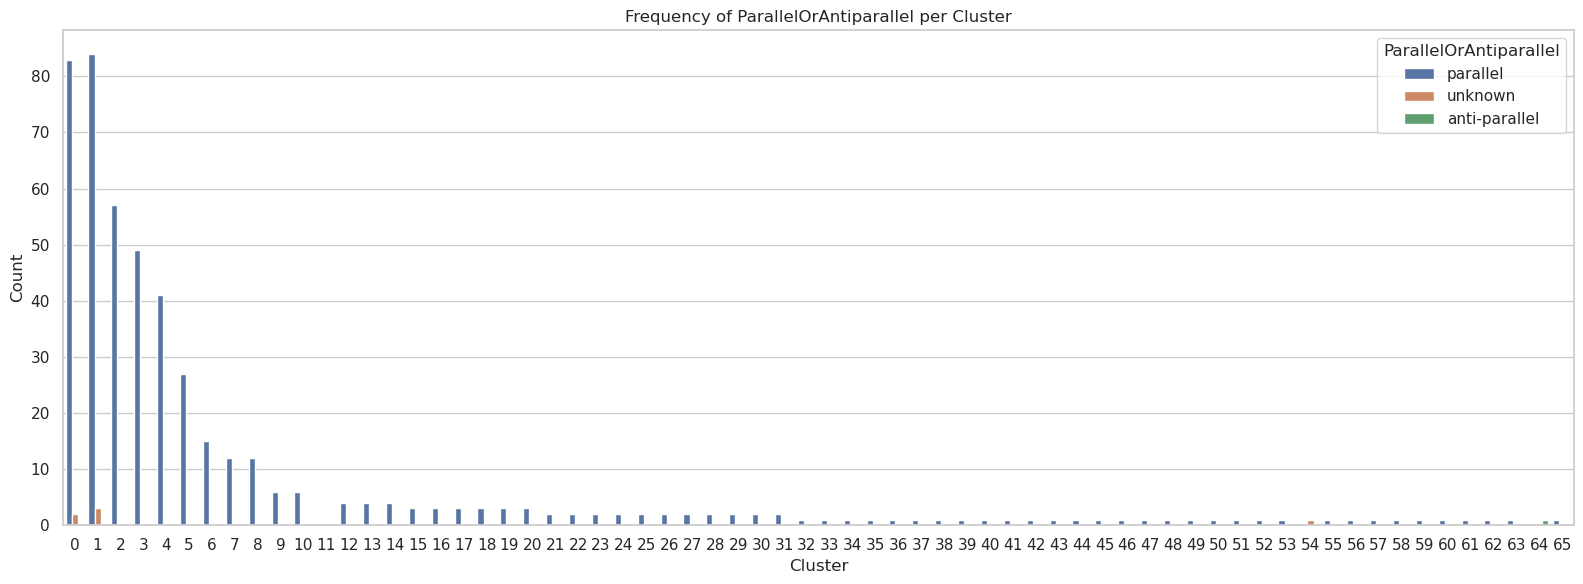

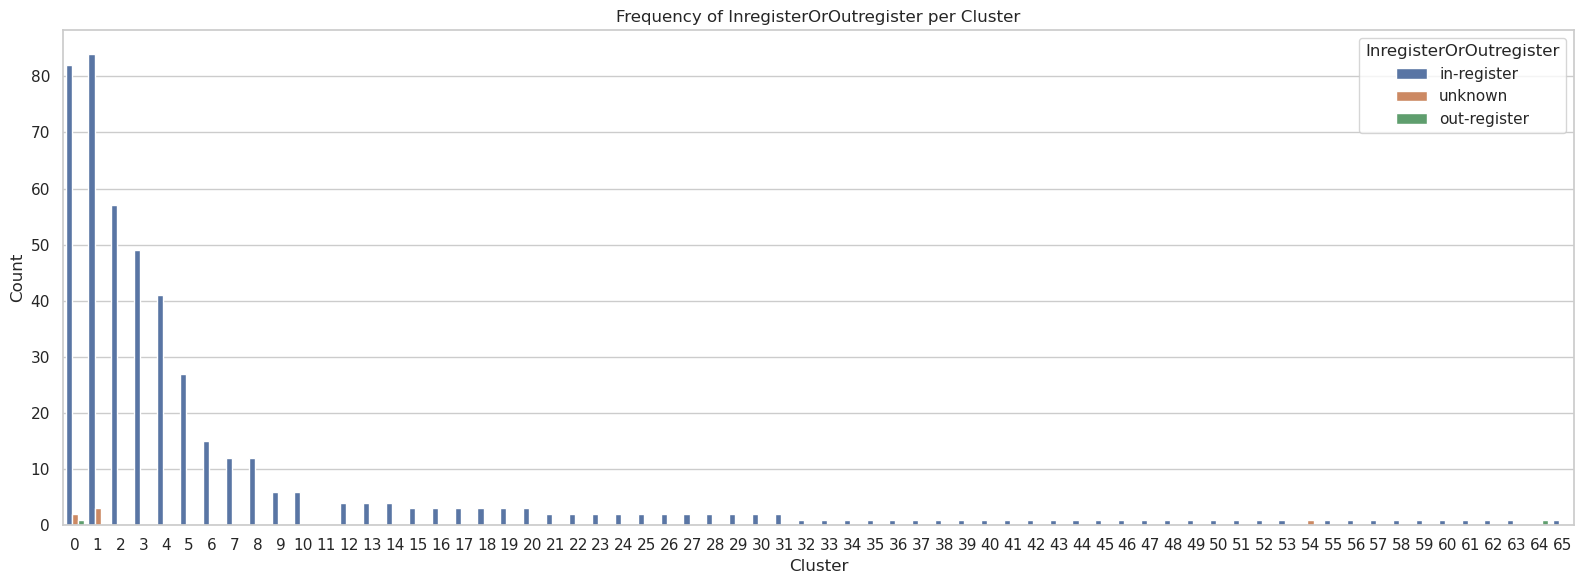

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create one plot per categorical feature
for feature in feature_cols_cat:
    plt.figure(figsize=(16, 6))
    sns.countplot(data=merged_nodes, x='cluster', hue=feature)
    plt.title(f'Frequency of {feature} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=feature)
    plt.tight_layout()
    plt.show()

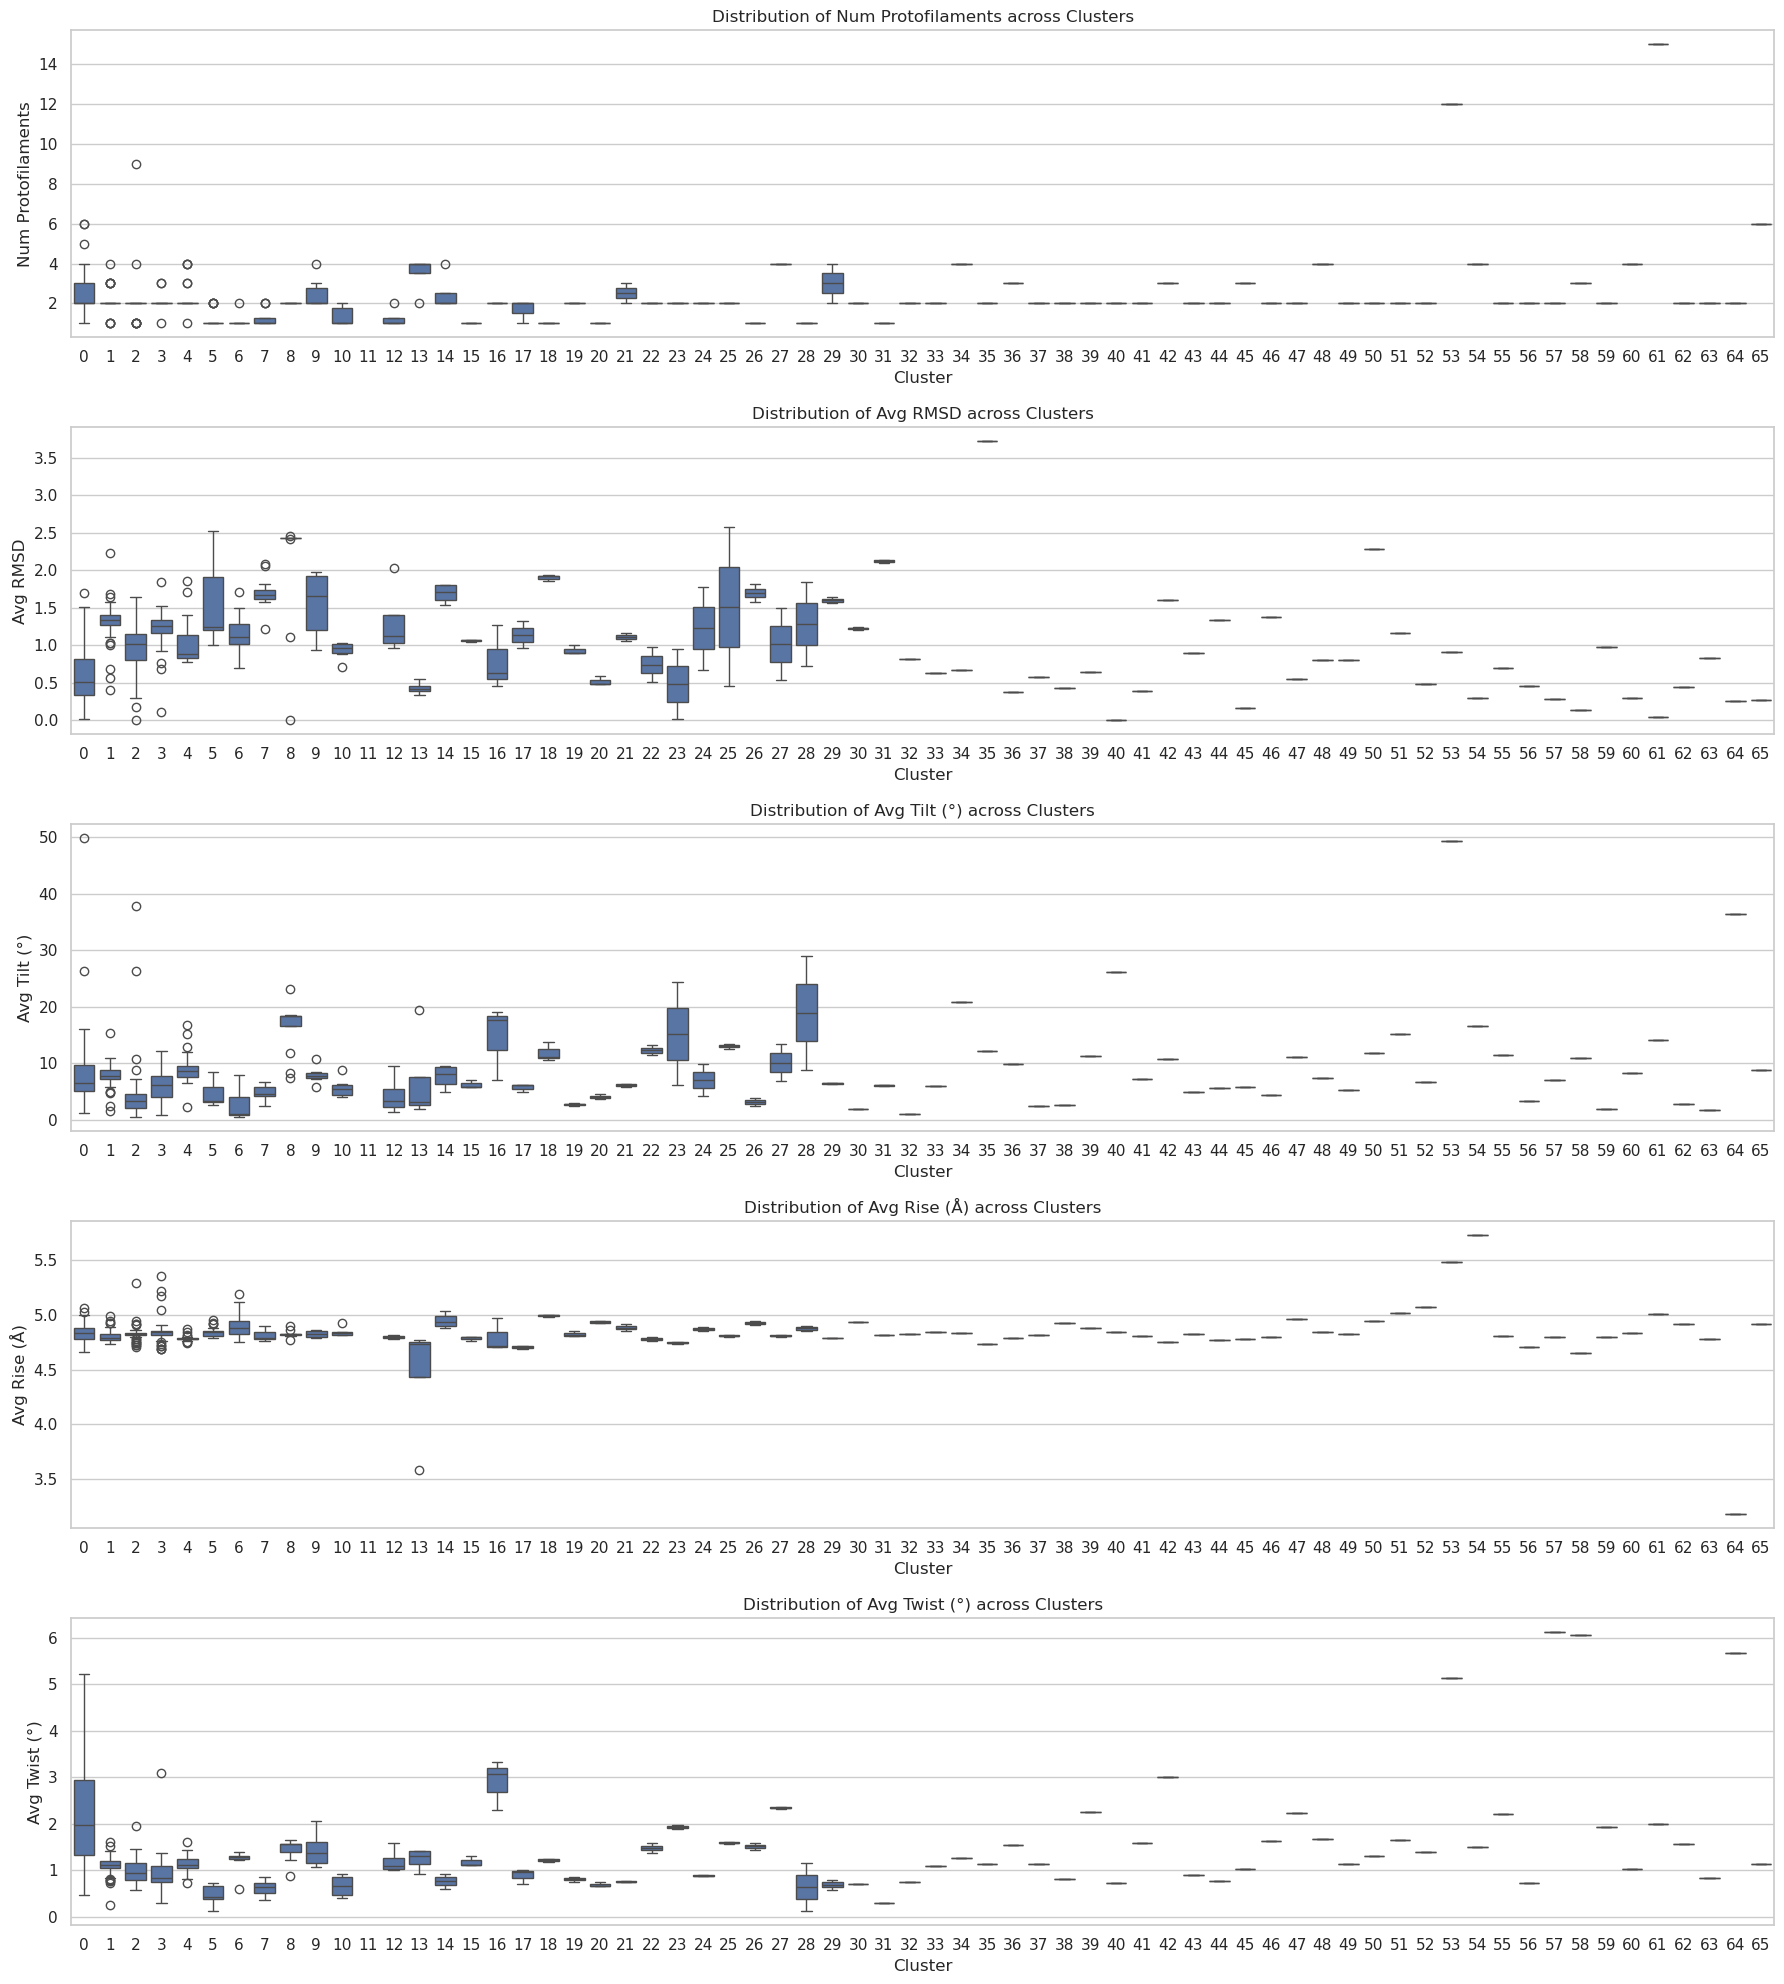

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Define how many features and set up figure size
num_features = len(feature_cols_num)
figsize = (18, 4 * num_features)

# Create subplots for each feature
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=figsize)

# Plot each feature in a separate boxplot
for i, feature in enumerate(feature_cols_num):
    ax = axes[i] if num_features > 1 else axes
    sns.boxplot(data=merged_nodes, x='cluster', y=feature, ax=ax)
    ax.set_title(f'Distribution of {feature} across Clusters', fontsize=12)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

## Cross-sections of amyloids for each cluster

In [123]:
import glob
from pathlib import Path

# Define directory
# pdb_folder = "/scratch/leuven/375/vsc37540/Projects/Amyloid/pdb_files"
pdb_folder = "/data/leuven/375/vsc37540/Projects/Amyloid/tests"

# Get all PDB files from pdb_files directory
pdb_files = glob.glob(f"{pdb_folder}/*.pdb")

# Create a dictionary to track seen files (case-insensitive)
seen_files = {}
unique_files = []

for file_path in pdb_files:
    # Get just the filename and convert to lowercase for comparison
    filename = Path(file_path).name.lower()
    
    # If we haven't seen this filename before, add to our unique list
    if filename not in seen_files:
        seen_files[filename] = True
        unique_files.append(file_path)
        
print("Number of unique pdb files:", len(unique_files))

Number of unique pdb files: 3


In [128]:
raw = beta_sheets_by_file.get(f"2lmn.pdb", {})
raw

{'A': ['17-21', '30-35'],
 'C': ['17-22', '30-35'],
 'E': ['12-13', '17-22', '30-35'],
 'G': ['11-13', '17-21', '31-35'],
 'I': ['11-13', '16-24', '31-35'],
 'K': ['12-13', '16-24', '31-35'],
 'B': ['17-21', '31-35'],
 'D': ['16-21', '31-35'],
 'F': ['16-21', '31-35'],
 'H': ['11-13', '17-23', '31-35'],
 'J': ['11-13', '17-23', '31-35'],
 'L': ['17-21', '31-35'],
 'M': ['16-21', '31-35'],
 'O': ['17-22', '30-35'],
 'Q': ['12-13', '17-22', '30-35'],
 'S': ['12-13', '17-21', '31-35'],
 'N': ['17-21', '31-35'],
 'P': ['16-21', '31-35'],
 'R': ['16-21', '31-35'],
 'T': ['17-21', '31-35']}

In [140]:
import os
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis import Universe
from MDAnalysis.coordinates.PDB import PDBWriter
from tqdm import tqdm  # for progress bar
import random
from numpy.linalg import norm
from numpy import dot
from sklearn.cluster import DBSCAN

# === Your helper functions ===
def normalize_coords(coords):
    coords -= coords.mean(axis=0)  # center
    max_extent = np.max(np.linalg.norm(coords, axis=1))
    coords /= max_extent  # scale uniformly
    return coords

def save_clean_cross_section(coords_2d, save_path):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(coords_2d[:, 0], coords_2d[:, 1], 'o', color='black', linewidth=2, markersize=4)
    ax.set_axis_off()
    ax.set_aspect('equal', adjustable='datalim')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path, dpi=150, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close(fig)

def rotate_coords(coords, angle_deg):
    theta = np.radians(angle_deg)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])
    return coords @ rotation_matrix.T

def get_cross_section_from_chain(ca_atoms, fibril_axis, fibril_center):
    coords = ca_atoms.positions
    cross_section_points = []

    # Define orthonormal basis in the plane
    arbitrary = np.array([1, 0, 0]) if abs(dot(fibril_axis, [1, 0, 0])) < 0.9 else np.array([0, 1, 0])
    axis1 = np.cross(fibril_axis, arbitrary)
    axis1 /= norm(axis1)
    axis2 = np.cross(fibril_axis, axis1)

    for atom in coords:
        vec = atom - fibril_center
        projected = project_onto_plane(vec, fibril_axis)
        x = dot(projected, axis1)
        y = dot(projected, axis2)
        cross_section_points.append([x, y])

    return np.array(cross_section_points)
   

# === Core loop to process a directory ===

# List of PDB files to exclude from your dataframe
def process_all_chains(pdb_files, output_dir):

    failed_pdbs = []

    for pdb_file in tqdm(pdb_files, desc="Processing PDBs"):
        try:
            u = Universe(pdb_file)
            pdb_id = os.path.splitext(os.path.basename(pdb_file))[0]
            protofilaments = cluster_protofilaments(u, pdb_id)
            print(f"Processing {pdb_id}, found protofilaments: {protofilaments}")

            # Sheet_residues mapping chain -> [(start,end), ...] for pdb_id
            raw = beta_sheets_by_file.get(f"{pdb_id}.pdb", {})
            sheet_res = {}
            for chain, ranges in raw.items():
                sheet_res[chain] = []
                for r in ranges:
                    start, end = map(int, r.split("-"))
                    sheet_res[chain].append((start, end))

            combined_group_selections = {}
            combined_group_selections_CA = {}
            combined_group_selections_foldx = {}
        
            # Loop over protofilaments to get group selections
            for pf_index, (pf_name, chain_ids) in enumerate(protofilaments.items()):
                centers = []
                cid_to_center = {}
            
                for cid in chain_ids:
                    bb_ranges = sheet_res.get(cid, [])
                    print(f"Chain {cid} ranges from sheet_res: {bb_ranges}")
                    if not bb_ranges:
                        print(f"No β-strand ranges found for chain {cid} in {pdb_file}")
                        continue

                    sel_str = " or ".join([f"(resid {start} to {end})" for start, end in bb_ranges])
                    bb = u.select_atoms(f"segid {cid} and ({sel_str})")
                    if len(bb) == 0:
                        print(f"No β-strand ranges found for chain {cid} in {pdb_file}")
                        continue  
            
                    com = bb.center_of_mass()
                    centers.append(com)
                    cid_to_center[cid] = com
            
                if len(centers) < 2:
                    print(f"Warning: not enough valid chains for {pf_name}. Skipping.")
                    continue
            
                # Now it's safe to proceed
                centers = np.array(centers)
                fibril_axis, fibril_center = compute_fibril_axis(centers)
                print(f"Fibril axis for {pf_name}: {fibril_axis}, center: {fibril_center}")

                # Now that we have axis, we can group
                grouped_chains = group_chains_by_fibrillar_plane(u, protofilaments, pdb_id, fibril_axis)
                print(f"Grouped chains for {pf_name}: {grouped_chains}")

            for pf_index, (pf_name, chain_groups) in enumerate(grouped_chains.items()):
                centers = []
                group_selections = {}
                group_selections_CA = {}
                group_selections_foldx = {}

                for group_idx, group in enumerate(chain_groups):
                    # If group has multiple chains, select their individual regions
                    if len(group) > 1:
                        common_range = find_common_beta_strands(pdb_id, group)
                        if not common_range:
                            print(f"No common β-strand region for group {group}. Falling back to individual β-strand selections.")
                            use_individual_ranges = True
                        else:
                            use_individual_ranges = False
                    else:
                        # If the group has only one chain, select the common β-strand region for the entire protofilament
                        common_range = find_common_beta_strands(pdb_id, protofilaments[pf_name])  # All chains of the protofilament
                        use_individual_ranges = False if common_range else True

                    sel_parts_CA_sheets = []
                    sel_parts_backbone = []
                    sel_parts_CA = []
                    sel_parts_foldx = []

                    for cid in group:
                        if use_individual_ranges:
                            # Use the sheet regions from each chain individually
                            all_ranges = []
                            for sheet_name, chains in sheet_res.items():
                                all_ranges.extend(chains.get(cid, []))

                            sel_parts_CA_sheets.extend([
                                f"(name CA and segid {cid} and resid {start} to {end})"
                                for start, end in all_ranges
                            ])
                            sel_parts_backbone.extend([f"(name CA C N and segid {cid})"])
                            sel_parts_CA.extend([f"(name CA and segid {cid})"])
                            sel_parts_foldx.extend([f"(segid {cid})"])
                        else:
                            common_range = find_common_beta_strands(pdb_id, protofilaments[pf_name])
                            sel_parts_CA_sheets.extend([
                                f"(name CA and segid {cid} and resid {start} to {end})"
                                for start, end in common_range
                            ])
                            sel_parts_backbone.extend([f"(name CA C N and segid {cid})"])
                            sel_parts_CA.extend([f"(name CA and segid {cid})"])
                            sel_parts_foldx.extend([f"(segid {cid})"])

                    if not sel_parts_CA_sheets:
                        print(f"No β-strand residues found for group {group} (chains: {', '.join(group)}), skipping...")
                        continue
                    sel_str_CA_sheets = " or ".join(sel_parts_CA_sheets)
                    sel_str_CA_bb= " or ".join(sel_parts_CA)
                    sel_str_bb = " or ".join(sel_parts_backbone)
                    sel_parts_foldx = " or ".join(sel_parts_foldx)

                    # Select atoms based on the common or individual residues for the current chain
                    bb_CA_sheets = u.select_atoms(f"({sel_str_CA_sheets})")
                    bb_CA = u.select_atoms(f"({sel_str_CA_bb})")
                    bb_all = u.select_atoms(f"({sel_str_bb})")
                    atoms_foldx = u.select_atoms(f"({sel_parts_foldx})")

                    if len(bb_CA_sheets) == 0:
                        print(f"Warning: no backbone atoms selected for chain {group}. Skipping.")
                        continue

                    # Calculate the center of mass (COM) based on the selected atoms for the current chain
                    center = compute_chain_center(bb_CA_sheets)
                    if center is not None:
                        centers.append(center)
                        group_selections[group_idx] = (bb_all, center, group)
                        group_selections_CA[group_idx] = (bb_CA, center, group)
                        group_selections_foldx[group_idx] = (atoms_foldx, center, group)

                if not centers:
                    print(f"Warning: No valid chain groups found for {pf_name}. Skipping.")
                    continue

                # Compute fibril axis
                centers = np.array(centers)
                fibril_axis, fibril_center = compute_fibril_axis(centers)
                # print(group_selections.items())
                
                # Add current protofilament's group_selections to combined dict
                for group_idx, (bb_all, center, group) in group_selections.items():
                    if group_idx not in combined_group_selections:
                        combined_group_selections[group_idx] = []
                    combined_group_selections[group_idx].append((bb_all, center, group))

                for group_idx, (bb_CA, center, group) in group_selections_CA.items():
                    if group_idx not in combined_group_selections_CA:
                        combined_group_selections_CA[group_idx] = []
                    combined_group_selections_CA[group_idx].append((bb_CA, center, group))

                for group_idx, (atoms_foldx, center, group) in group_selections_foldx.items():
                    if group_idx not in combined_group_selections_foldx:
                        combined_group_selections_foldx[group_idx] = []
                    combined_group_selections_foldx[group_idx].append((atoms_foldx, center, group))                   

            # Now combine and process group 0 as an example
            group_idx = 0
            selections = combined_group_selections.get(group_idx, [])
            selections_CA = combined_group_selections_CA.get(group_idx, [])
            selections_foldx = combined_group_selections_foldx.get(group_idx, [])

            if not selections:
                print(f"No selections for group {group_idx}, skipping.")
                continue

            if not selections_CA:
                print(f"No selections for group {group_idx}, skipping.")
                continue

            if not selections_foldx:
                print(f"No selections for group {group_idx}, skipping.")
                continue

            bb_atoms_list = [bb_all for bb_all, _, _ in selections]
            group_chain_ids = [cid for _, _, chains in selections for cid in chains]

            combined_bb_atoms = bb_atoms_list[0]
            for ag in bb_atoms_list[1:]:
                combined_bb_atoms += ag

            bb_atoms_list_CA = [bb_CA for bb_CA, _, _ in selections_CA]
            group_chain_ids_CA = [cid for _, _, chains in selections_CA for cid in chains]

            combined_bb_atoms_CA = bb_atoms_list_CA[0]
            for ag in bb_atoms_list_CA[1:]:
                combined_bb_atoms_CA += ag
            print(f"{(combined_bb_atoms_CA)} for chains {group_chain_ids_CA}.")
            print(f"{(bb_atoms_list_CA)} for chains {group_chain_ids_CA}.")


            atom_list_foldx = [bb_CA for bb_CA, _, _ in selections_foldx]
            group_chain_ids_foldx = [cid for _, _, chains in selections_foldx for cid in chains]

            combined_atoms_foldx = atom_list_foldx[0]
            for ag in atom_list_foldx[1:]:
                combined_atoms_foldx += ag
            print(f"{(combined_atoms_foldx)} for chains {group_chain_ids_foldx}.")
            print(f"{(atom_list_foldx)} for chains {group_chain_ids_foldx}.")


            print(f"Processing combined group {group_idx} with chains: {', '.join(group_chain_ids)}")

            # # Proceed with projection and image creation
            coords_2d = get_cross_section_from_chain(combined_bb_atoms, fibril_axis, fibril_center)
            coords_2d = normalize_coords(coords_2d)

            base_name = os.path.splitext(os.path.basename(pdb_file))[0]
            chain_label = "_".join(group_chain_ids)
            image_name = f"{base_name}_group{group_idx}_chains{chain_label}.png"
            save_path = os.path.join(output_dir, "images" ,image_name)

            save_clean_cross_section(coords_2d, save_path)

            # Generate a clean output name
            base_name = os.path.splitext(os.path.basename(pdb_file))[0]
            chain_label = "_".join(group_chain_ids_CA)
            output_file = os.path.join(output_dir, "pdb", f"{base_name}_group{group_idx}_chains{chain_label}.pdb")

            # Write the combined AtomGroup as one PDB
            with PDBWriter(output_file) as writer:
                writer.write(combined_atoms_foldx)
                
        except Exception as e:
            failed_pdbs.append(os.path.splitext(os.path.basename(pdb_file))[0])
            print(f"❌ Error processing {pdb_file}: {e}")
    
    return failed_pdbs

# === Run it ===

# output_dir = "/data/leuven/375/vsc37540/Projects/Amyloid/cross-sections/clustered23"
output_dir = "/data/leuven/375/vsc37540/Projects/Amyloid/stamp_db"
# output_dir_foldx = "/data/leuven/375/vsc37540/Projects/Amyloid/output/foldx"
os.makedirs(os.path.join(output_dir, "pdb"), exist_ok=True)
# os.makedirs(os.path.join(output_dir_foldx, "pdb"), exist_ok=True)

process_all_chains(unique_files, output_dir)
# process_all_chains(unique_files, output_dir_foldx)

Processing PDBs:   0%|          | 0/3 [00:00<?, ?it/s]

/data/leuven/375/vsc37540/.conda/envs/amyloid/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning:

Found no information for attr: 'formalcharges' Using default value of '0'

Processing PDBs:  33%|███▎      | 1/3 [00:00<00:00,  4.73it/s]

Processing 2lmn, found protofilaments: {'PF1': ['I', 'C', 'G', 'A', 'O', 'M', 'S', 'E', 'K', 'Q'], 'PF2': ['N', 'H', 'D', 'F', 'P', 'B', 'R', 'L', 'T', 'J']}
Chain I ranges from sheet_res: [(11, 13), (16, 24), (31, 35)]
Chain C ranges from sheet_res: [(17, 22), (30, 35)]
Chain G ranges from sheet_res: [(11, 13), (17, 21), (31, 35)]
Chain A ranges from sheet_res: [(17, 21), (30, 35)]
Chain O ranges from sheet_res: [(17, 22), (30, 35)]
Chain M ranges from sheet_res: [(16, 21), (31, 35)]
Chain S ranges from sheet_res: [(12, 13), (17, 21), (31, 35)]
Chain E ranges from sheet_res: [(12, 13), (17, 22), (30, 35)]
Chain K ranges from sheet_res: [(12, 13), (16, 24), (31, 35)]
Chain Q ranges from sheet_res: [(12, 13), (17, 22), (30, 35)]
Fibril axis for PF1: [ 0.00513176 -0.02234131  0.99973723], center: [54.12388205 17.35145203 53.57223197]
Grouped chains for PF1: {'PF1': [('A',), ('C',), ('E',), ('G',), ('I',), ('K', 'M'), ('O',), ('Q',), ('S',)], 'PF2': [('B',), ('D',), ('F',), ('H',), ('J',)

/data/leuven/375/vsc37540/.conda/envs/amyloid/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning:

Found no information for attr: 'formalcharges' Using default value of '0'

Processing PDBs:  67%|██████▋   | 2/3 [00:00<00:00,  4.86it/s]

Processing 2lmo, found protofilaments: {'PF1': ['I', 'C', 'G', 'A', 'O', 'M', 'S', 'E', 'K', 'Q'], 'PF2': ['N', 'H', 'D', 'F', 'P', 'B', 'R', 'L', 'T', 'J']}
Chain I ranges from sheet_res: [(12, 13), (16, 21), (31, 35)]
Chain C ranges from sheet_res: [(16, 21), (30, 35)]
Chain G ranges from sheet_res: [(17, 22), (30, 35)]
Chain A ranges from sheet_res: [(16, 21), (31, 35)]
Chain O ranges from sheet_res: [(16, 22), (30, 35)]
Chain M ranges from sheet_res: [(16, 21), (30, 35)]
Chain S ranges from sheet_res: [(17, 21), (31, 35)]
Chain E ranges from sheet_res: [(17, 22), (30, 35)]
Chain K ranges from sheet_res: [(12, 13), (16, 21), (31, 35)]
Chain Q ranges from sheet_res: [(17, 22), (30, 35)]
Fibril axis for PF1: [ 0.08452181 -0.06861009 -0.9940567 ], center: [24.49324347 66.24489402 57.22536161]
Grouped chains for PF1: {'PF1': [('S',), ('Q',), ('O',), ('M',), ('K',), ('I',), ('G',), ('E',), ('C',), ('A',)], 'PF2': [('T',), ('R',), ('P',), ('N',), ('L',), ('J',), ('H',), ('F',), ('D',), ('

/data/leuven/375/vsc37540/.conda/envs/amyloid/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning:

Found no information for attr: 'formalcharges' Using default value of '0'

Processing PDBs: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


[]

In [139]:
unique_files

['/data/leuven/375/vsc37540/Projects/Amyloid/tests/2lmn.pdb',
 '/data/leuven/375/vsc37540/Projects/Amyloid/tests/2lmo.pdb',
 '/data/leuven/375/vsc37540/Projects/Amyloid/tests/2lmp.pdb']

In [82]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = "/data/leuven/375/vsc37540/Projects/Amyloid/cross-sections/images/6a6b_group0_chainsF_G.png"
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/data/leuven/375/vsc37540/Projects/Amyloid/cross-sections/images/6a6b_group0_chainsF_G.png'

In [129]:
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import defaultdict
import glob

# Path to your cross-section images
image_dir = "/data/leuven/375/vsc37540/Projects/Amyloid/cross-sections/clustered23/images"

# Load cluster assignments
pdb_to_cluster = {}
with open("/data/leuven/375/vsc37540/Projects/Amyloid/output/cosmograph_data/nodes_with_clusters_weighted23.csv", "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        pdb_to_cluster[row["id"].lower()] = int(row["cluster"])

# Step 1: Group keys by pdb prefix
grouped = defaultdict(list)
for key in pdb_to_cluster.keys():
    pdb = key.split('_')[0]
    grouped[pdb].append(key)

# Step 2: Pick the longest key per pdb and get its cluster
pdb_to_longest_cluster = {}
for pdb, keys in grouped.items():
    longest_key = max(keys, key=len)  # longest key string per pdb
    cluster = pdb_to_cluster[longest_key]
    pdb_to_longest_cluster[pdb] = cluster

# Find all images and match to clusters
cluster_images = defaultdict(list)

for image_path in glob.glob(os.path.join(image_dir, "*.png")):
    filename = os.path.basename(image_path)
    pdb_id = filename.split("_")[0].lower()  # extract PDB ID from start of filename
    if pdb_id in pdb_to_longest_cluster:
        cluster_id = pdb_to_longest_cluster[pdb_id]
        cluster_images[cluster_id].append((pdb_id, image_path))

# Sort clusters
for cluster_id in sorted(cluster_images.keys()):
    images = cluster_images[cluster_id]
    n = len(images)
    cols = 5
    rows = (n + cols - 1) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    fig.suptitle(f"Cluster {cluster_id}", fontsize=16)

    for i in range(rows * cols):
        ax = axs.flat[i] if rows > 1 else axs[i % cols]
        if i < n:
            pdb_id, img_path = images[i]
            img = mpimg.imread(img_path)
            ax.imshow(img)
            ax.set_title(pdb_id, fontsize=10)
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

KeyboardInterrupt: 

## Contact maps

/data/leuven/375/vsc37540/.conda/envs/amyloid/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


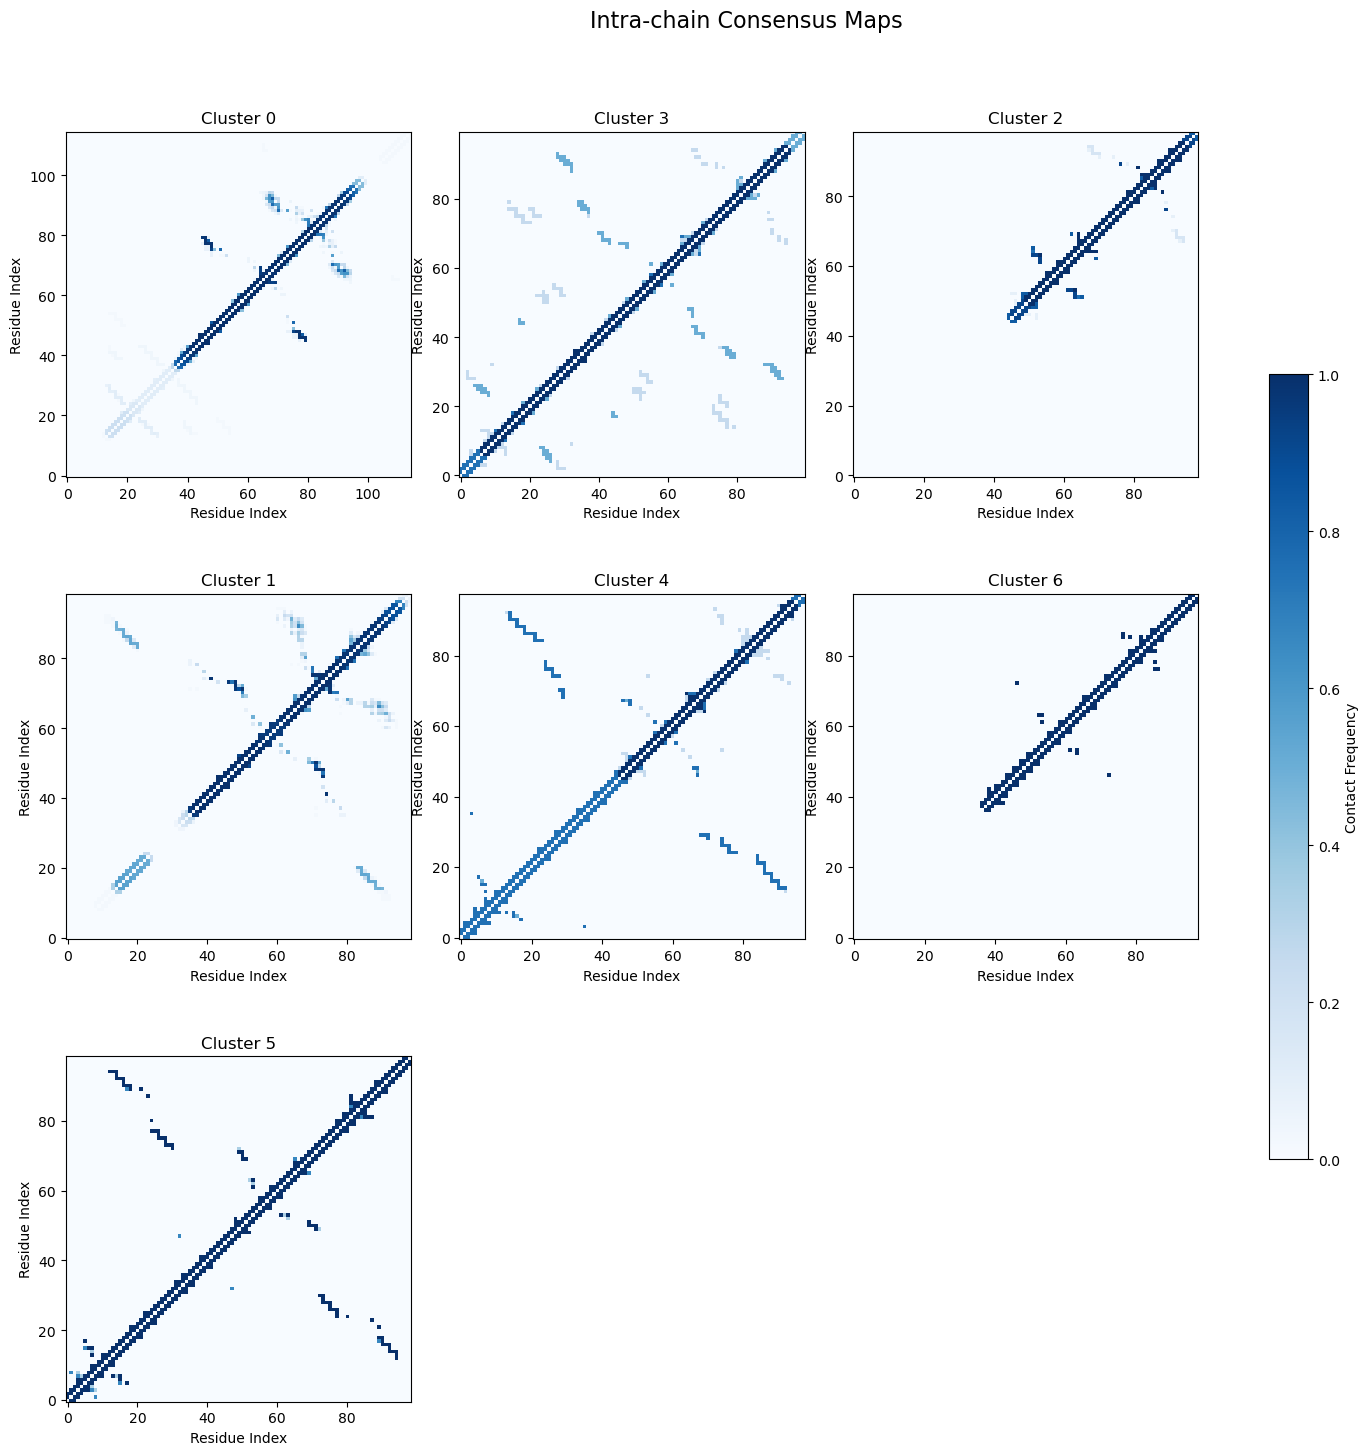

In [87]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from collections import defaultdict, Counter
import MDAnalysis as mda

# === Parameters ===
pdb_folder = "/data/leuven/375/vsc37540/Projects/Amyloid/cross-sections/syn/pdb"
threshold = 8.0

# === Functions ===
def get_contacts_and_labels(pdb_file, threshold=8.0):
    u = mda.Universe(pdb_file)
    ca_atoms = u.select_atoms("name CA")  # Adjust segids as needed

    coords = ca_atoms.positions
    resids = ca_atoms.resids
    resnames = ca_atoms.resnames
    segids = ca_atoms.segids
    n_atoms = len(ca_atoms)
    
    # Count atoms per segment (chain)
    longest_chain = max(resids)

    contact_map_labeled = np.zeros((n_atoms, n_atoms), dtype=int)

    for i in range(n_atoms):
        for j in range(i + 1, n_atoms):
            dist = np.linalg.norm(coords[i] - coords[j])
            if dist <= threshold:
                contact_type = 1 if segids[i] == segids[j] else 2  # 1 = intra, 2 = inter
                contact_map_labeled[i, j] = contact_type
                contact_map_labeled[j, i] = contact_type

    return n_atoms, longest_chain, contact_map_labeled, resids

# === Cluster mapping ===

# Step 1: Group PDB files by cluster
cluster_to_pdbs = defaultdict(list)
for pdb, cluster in pdb_to_longest_cluster.items():
    cluster_to_pdbs[cluster].append(pdb)

intra_maps = {}
inter_maps = {}

for target_cluster in cluster_to_pdbs.keys():
    pdb_list = cluster_to_pdbs[target_cluster]
    longest_chain_list = []
    # === Step 1: Show individual contact maps ===
    for pdb in pdb_list:
        matching = glob.glob(os.path.join(pdb_folder, f"{pdb}*.pdb"))
        if not matching:
            print(f"❌ {pdb} not found")
            continue
        pdb_path = matching[0]

        n_atoms, longest_chain, contact_map_labeled, resids = get_contacts_and_labels(pdb_path, threshold)
        longest_chain_list.append(longest_chain)
        # Plot
        cmap = mcolors.ListedColormap(['white', 'blue', 'red'])
        bounds = [0, 0.5, 1.5, 2.5]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # plt.figure(figsize=(8, 7))
        # plt.imshow(contact_map_labeled, cmap=cmap, norm=norm, origin='lower')
        # plt.title(f'Contact Map: {os.path.basename(pdb_path)}\n(Cα–Cα ≤ {threshold} Å)')
        # plt.xlabel('Residue Index')
        # plt.ylabel('Residue Index')

        # legend_elements = [
        #     Patch(facecolor='blue', label='Intra-chain'),
        #     Patch(facecolor='red', label='Inter-chain')
        # ]
        # plt.legend(handles=legend_elements, loc='upper left')
        # plt.tight_layout()
        # plt.show()


    # === Step 2: Consensus contact map split by intra/inter ===
    longest_chain_length_overall = max(longest_chain_list)
    # Collect contact sets with types
    all_contacts_intra = []
    all_contacts_inter = []
    all_res_pairs_intra = set()
    all_res_pairs_inter = set()


    for pdb in pdb_list:
        matching = glob.glob(os.path.join(pdb_folder, f"{pdb}*.pdb"))
        if not matching:
            continue
        pdb_path = matching[0]
        n_atoms, longest_chain_length, contact_map, resids = get_contacts_and_labels(pdb_path, threshold)
        
        contacts_intra = set()
        contacts_inter = set()
        
        for i in range(contact_map.shape[0]):
            for j in range(i + 1, contact_map.shape[1]):
                ctype = contact_map[i, j]
                if ctype == 1:  # intra-chain
                    pair = tuple(sorted((resids[i], resids[j])))
                    contacts_intra.add(pair)
                    all_res_pairs_intra.update(pair)
                elif ctype == 2:  # inter-chain
                    pair = tuple(sorted((resids[i], resids[j])))
                    contacts_inter.add(pair)
                    all_res_pairs_inter.update(pair)
                    
        all_contacts_intra.append(contacts_intra)
        all_contacts_inter.append(contacts_inter)

    # Count frequency for intra
    contact_counter_intra = Counter()
    for contact_set in all_contacts_intra:
        for pair in contact_set:
            contact_counter_intra[pair] += 1

    # Count frequency for inter
    contact_counter_inter = Counter()
    for contact_set in all_contacts_inter:
        for pair in contact_set:
            contact_counter_inter[pair] += 1

    # Build intra consensus matrix
    consensus_map_intra = np.zeros((longest_chain_length_overall, longest_chain_length_overall))

    n_structures = len(all_contacts_intra)

    for (res1, res2), count in contact_counter_intra.items():
        freq = count / n_structures
        consensus_map_intra[res1-1, res2-1] = freq
        consensus_map_intra[res2-1, res1-1] = freq

    # Build inter consensus matrix
    consensus_map_inter = np.zeros((longest_chain_length_overall, longest_chain_length_overall))

    n_structures = len(all_contacts_inter)

    for (res1, res2), count in contact_counter_inter.items():
        freq = count / n_structures
        consensus_map_inter[res1-1, res2-1] = freq
        consensus_map_inter[res2-1, res1-1] = freq

    intra_maps[target_cluster] = consensus_map_intra
    inter_maps[target_cluster] = consensus_map_inter

import math

n_clusters = len(intra_maps)
cols = 3
rows = math.ceil(n_clusters / cols)

plt.figure(figsize=(5 * cols, 5 * rows))

for i, (cluster, cmap_data) in enumerate(intra_maps.items()):
    ax = plt.subplot(rows, cols, i + 1)
    im = ax.imshow(cmap_data, cmap='Blues', origin='lower', vmin=0, vmax=1)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('Residue Index')
    ax.set_ylabel('Residue Index')

plt.suptitle('Intra-chain Consensus Maps', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.colorbar(im, ax=plt.gcf().get_axes(), shrink=0.6, label='Contact Frequency')
plt.show()

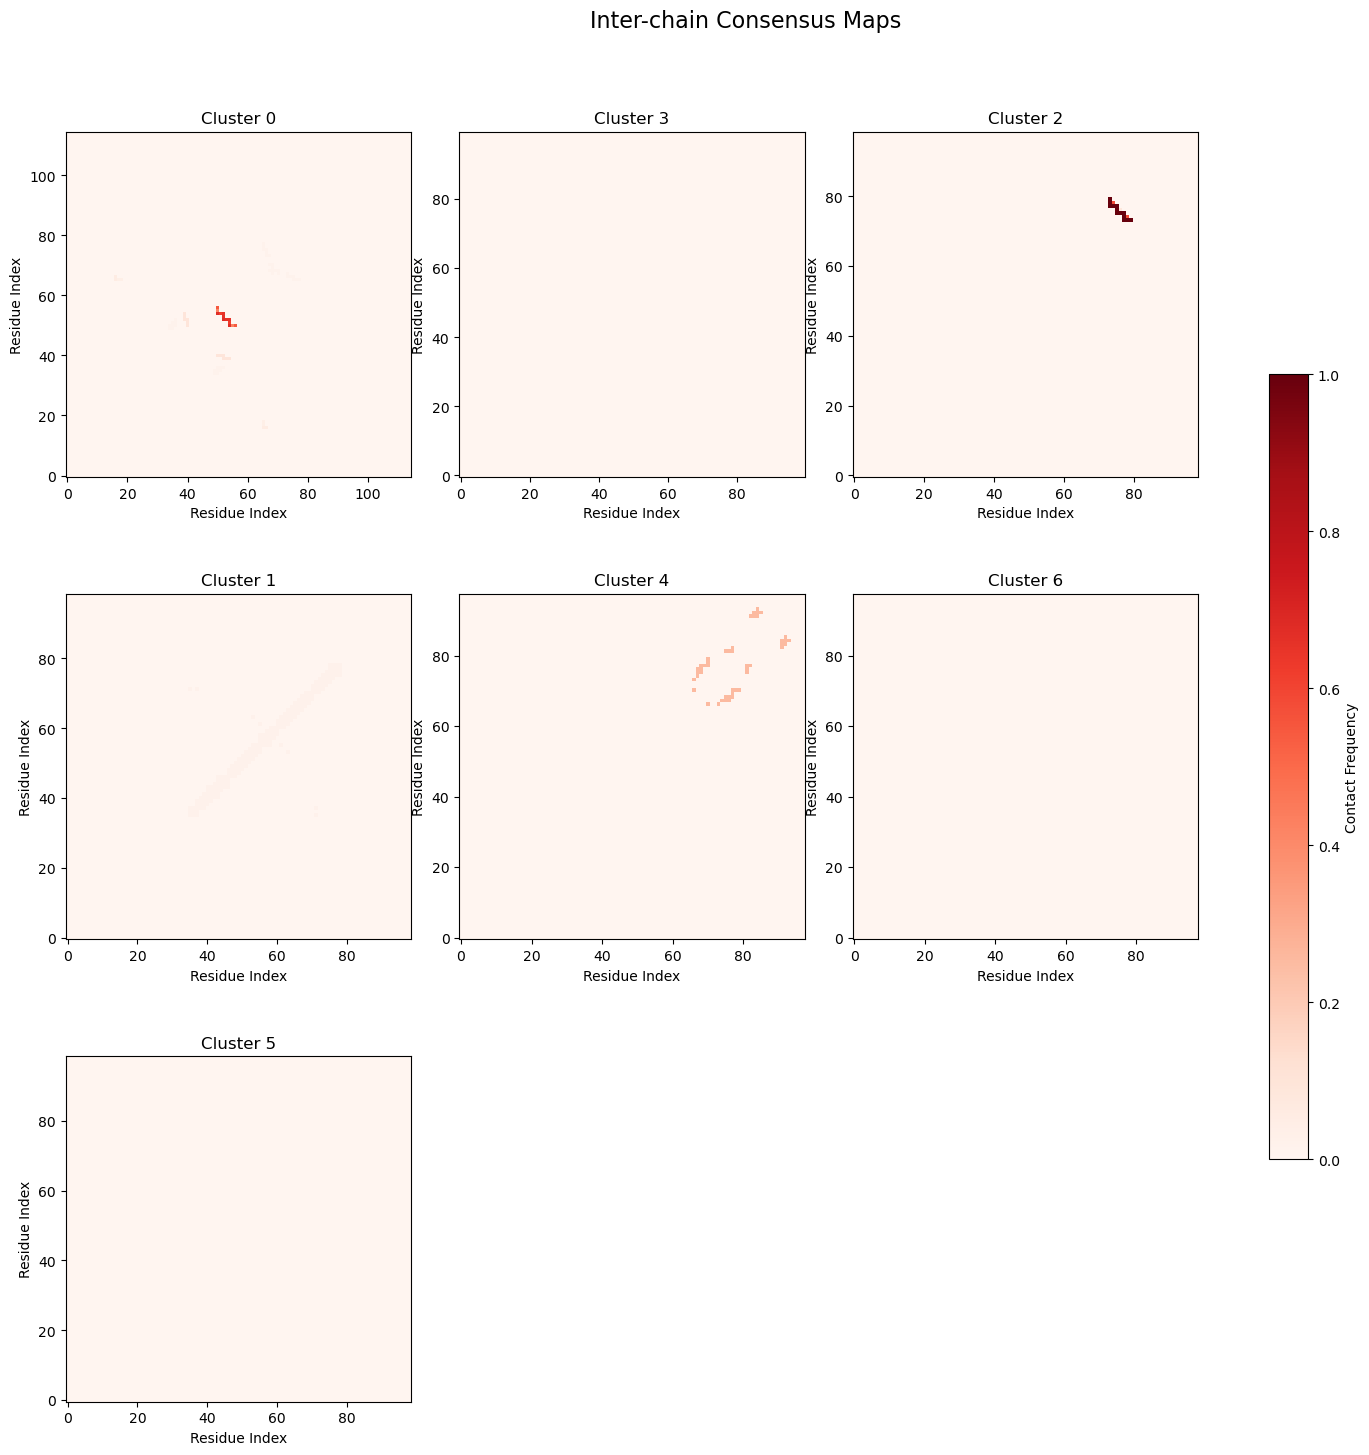

In [9]:
plt.figure(figsize=(5 * cols, 5 * rows))

for i, (cluster, cmap_data) in enumerate(inter_maps.items()):
    ax = plt.subplot(rows, cols, i + 1)
    im = ax.imshow(cmap_data, cmap='Reds', origin='lower', vmin=0, vmax=1)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('Residue Index')
    ax.set_ylabel('Residue Index')

plt.suptitle('Inter-chain Consensus Maps', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.colorbar(im, ax=plt.gcf().get_axes(), shrink=0.6, label='Contact Frequency')
plt.show()

/data/leuven/375/vsc37540/.conda/envs/amyloid/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


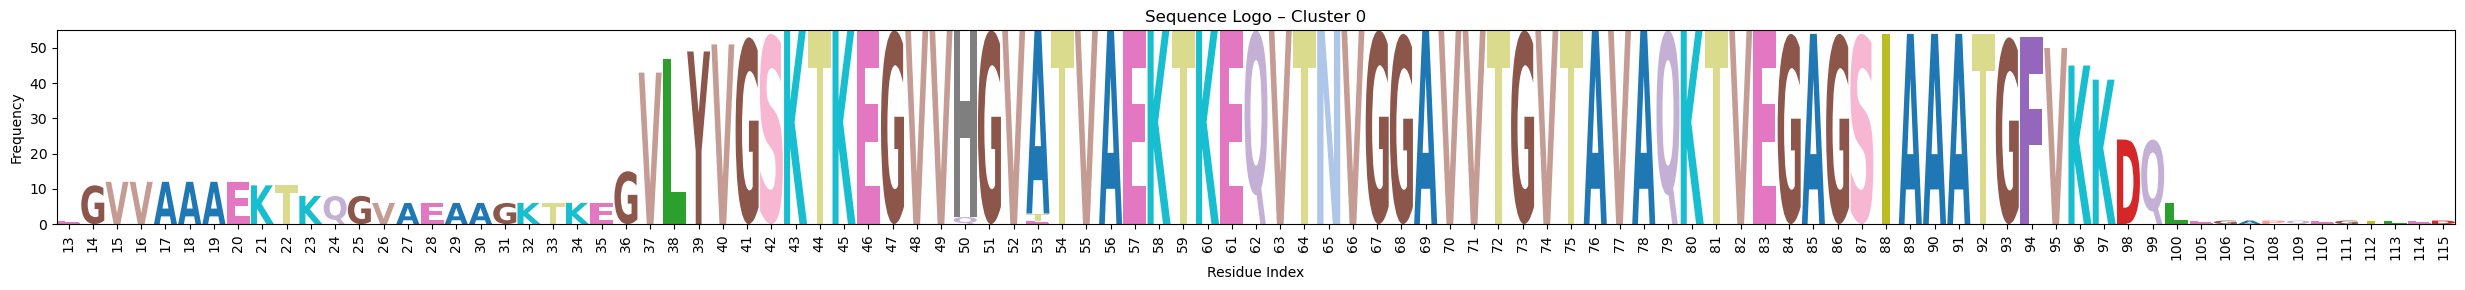

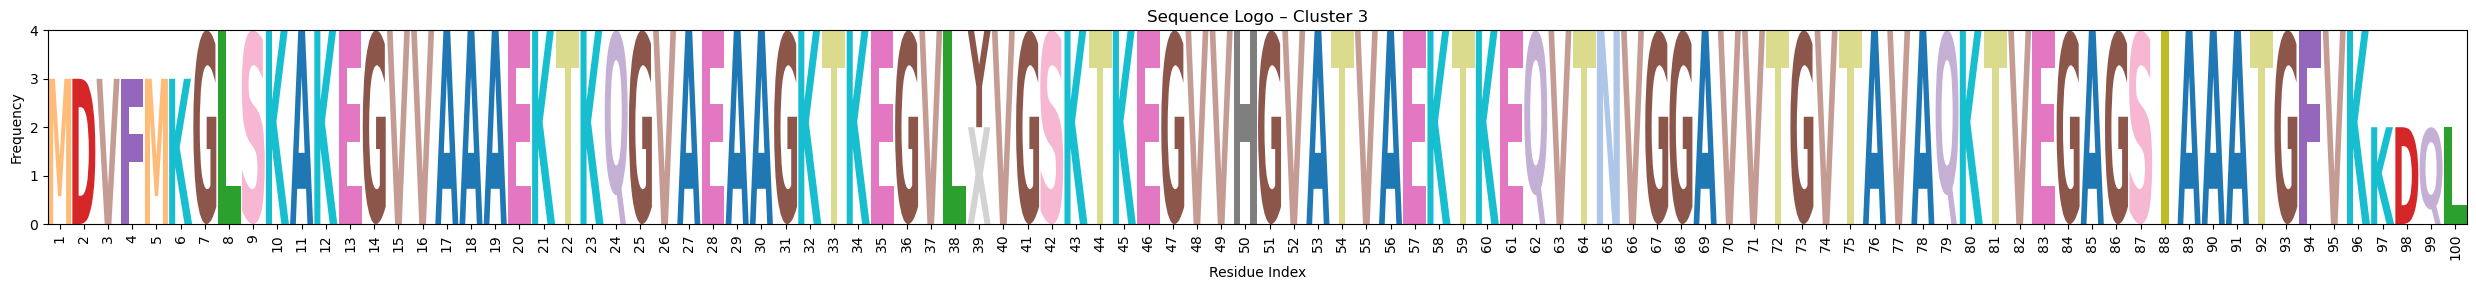

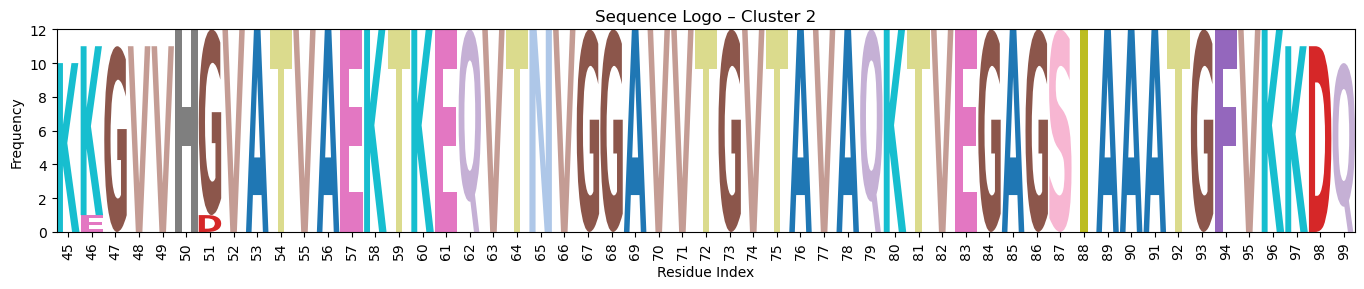

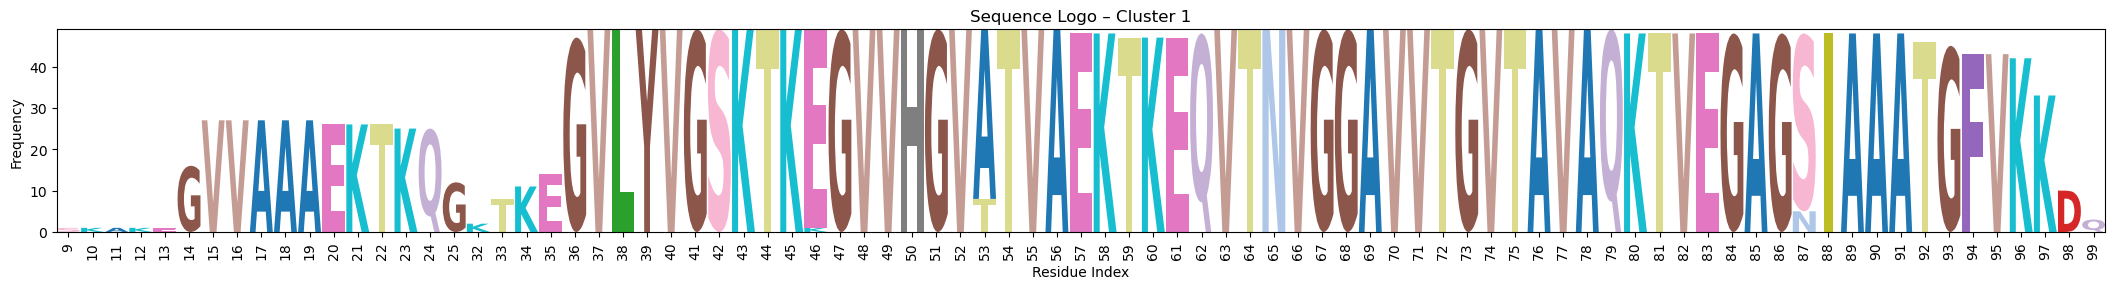

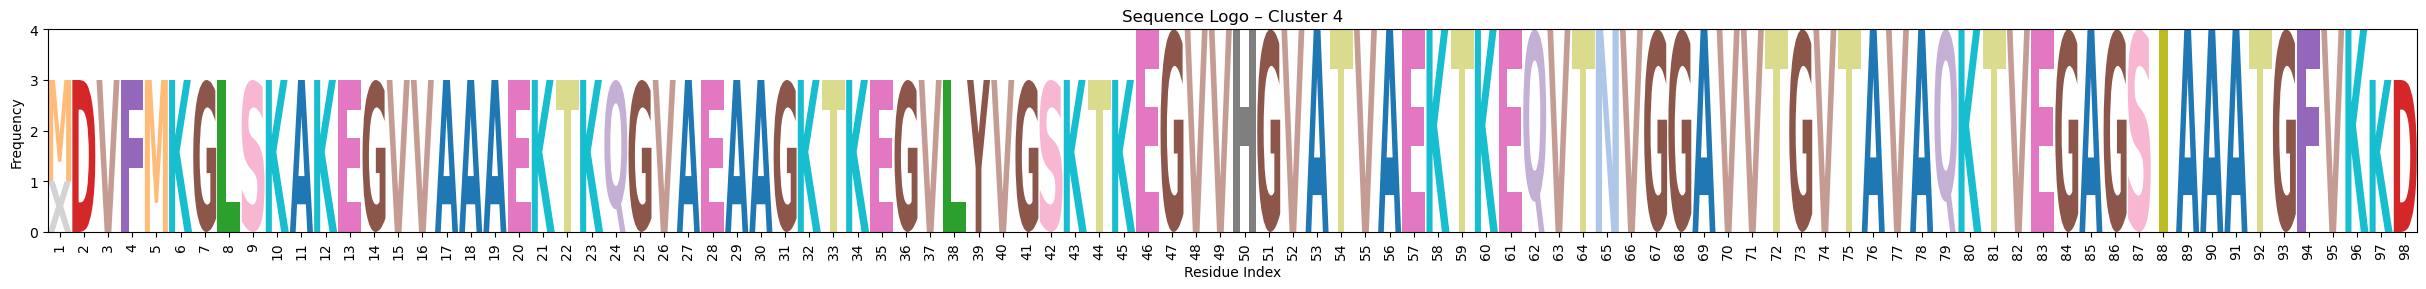

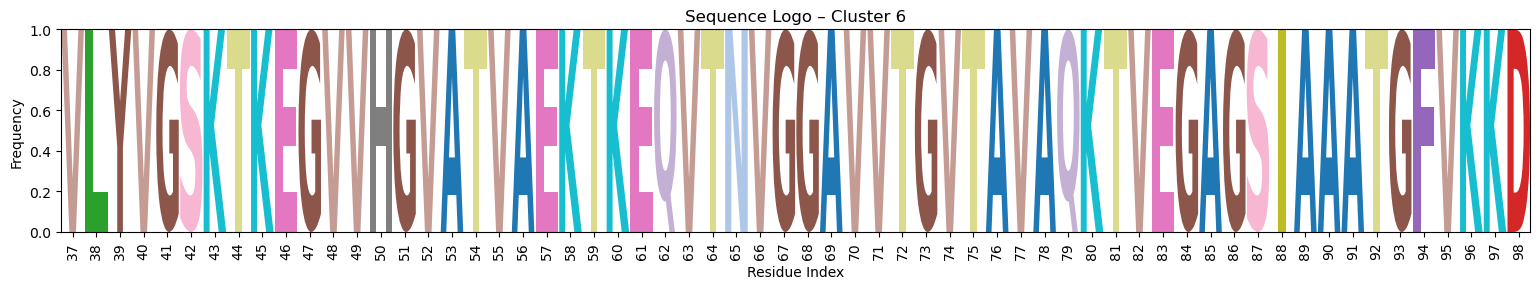

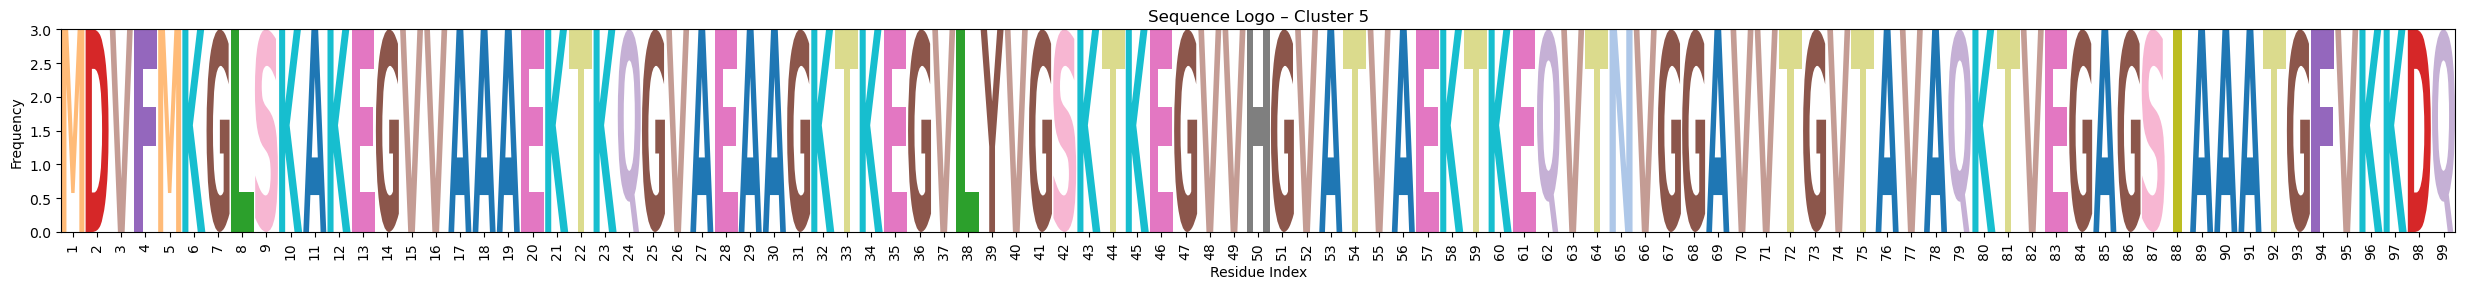

In [75]:
import MDAnalysis as mda
import logomaker
from collections import defaultdict
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

def extract_sequence(pdb_file):
    u = mda.Universe(pdb_file)
    ca_atoms = u.select_atoms("name CA")
    resnames = ca_atoms.resnames
    resids = ca_atoms.resids
    # Convert 3-letter to 1-letter codes
    three_to_one = mda.lib.util.convert_aa_code
    sequence = ''
    for res in resnames:
        try:
            aa = three_to_one(res)
        except ValueError:
            aa = 'X'
        sequence += aa
    return resids, sequence

def build_alignment(cluster, sequences, resid_order):
    aligned_records = []

    for i, resid_to_aa in enumerate(sequences):
        aligned_seq = ''.join([resid_to_aa.get(r, '-') for r in resid_order])
        aligned_records.append(SeqRecord(Seq(aligned_seq), id=f"{cluster}_seq{i}"))

    return aligned_records


# Step 1: Group PDB files by cluster
cluster_to_pdbs = defaultdict(list)
for pdb, cluster in pdb_to_longest_cluster.items():
    cluster_to_pdbs[cluster].append(pdb)

# Step 2: Collect aligned sequences per cluster
cluster_sequences = defaultdict(list)
all_resids_per_cluster = defaultdict(set)

for target_cluster in cluster_to_pdbs.keys():
    pdb_list = cluster_to_pdbs[target_cluster]

    for pdb in pdb_list:
        matching = glob.glob(os.path.join(pdb_folder, f"{pdb}*.pdb"))
        if not matching:
            continue
        pdb_path = matching[0]
        resids, seq = extract_sequence(pdb_path)
        
        resid_to_aa = {resid: aa for resid, aa in zip(resids, seq)}
        cluster_sequences[target_cluster].append(resid_to_aa)
        all_resids_per_cluster[target_cluster].update(resid_to_aa.keys())

aa_colors = {
    'A': '#1f77b4', 
    'C': '#ff7f0e',  
    'D': '#d62728',  
    'E': '#e377c2',  
    'F': '#9467bd',  
    'G': '#8c564b',  
    'H': '#7f7f7f',  
    'I': '#bcbd22',  
    'K': '#17becf',  
    'L': '#2ca02c',  
    'M': '#ffbb78',  
    'N': '#aec7e8',  
    'P': '#ff9896',  
    'Q': '#c5b0d5',
    'R': '#9edae5',  
    'S': '#f7b6d2',  
    'T': '#dbdb8d',  
    'V': '#c49c94', 
    'W': '#e377c2',  
    'Y': '#8c564b', 
    'X': '#d3d3d3', 
}

for cluster, seq_dicts in cluster_sequences.items():
    resid_order = sorted(all_resids_per_cluster[cluster])
    aligned = build_alignment(cluster, seq_dicts, resid_order)

    alignment = [str(rec.seq) for rec in aligned]
    logo_df = logomaker.alignment_to_matrix(alignment)

    fig, ax = plt.subplots(figsize=(len(resid_order) / 4, 3))
    logo = logomaker.Logo(logo_df, ax=ax, color_scheme=aa_colors)

    ax.set_title(f'Sequence Logo – Cluster {cluster}')
    ax.set_xlabel('Residue Index')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(len(resid_order)))
    ax.set_xticklabels(resid_order, rotation=90)
    plt.tight_layout()
    plt.show()

## FoldX

In [55]:
import os
import subprocess

pdb_dir = "/data/leuven/375/vsc37540/Projects/Amyloid/output/pdb_files/syn"
out_dir = "/data/leuven/375/vsc37540/Projects/Amyloid/output/foldx/syn"

for pdb_file in os.listdir(pdb_dir):
    if pdb_file.endswith(".pdb"):
        cmd = [
            "/data/leuven/375/vsc37540/FoldX/foldx5_1Linux64/foldx_20251231",
            "--command=SequenceDetail",
            f"--pdb={pdb_file}",
            f"--pdb-dir={pdb_dir}",
            f"--output-dir={out_dir}"
        ]
        subprocess.run(cmd)

   ********************************************
   ***                                      ***
   ***             FoldX 5.1 (c)            ***
   ***                                      ***
   ***     code by the FoldX Consortium     ***
   ***                                      ***
   ***     Jesper Borg, Frederic Rousseau   ***
   ***    Joost Schymkowitz, Luis Serrano   ***
   ***    Peter Vanhee, Erik Verschueren    ***
   ***     Lies Baeten, Javier Delgado      ***
   ***       and Francois Stricher          ***
   *** and any other of the 9! permutations ***
   ***   based on an original concept by    ***
   ***   Raphael Guerois and Luis Serrano   ***
   ********************************************

Start FoldX SequenceDetail >>>

1 models read: 6cu8.pdb
/data/leuven/375/vsc37540/Projects/Amyloid/output/pdb_files/syn/6cu8.pdb

BackHbond       =               -189.45
SideHbond       =               -19.28
Energy_VdW      =               -358.95
Electro         =             

In [115]:
import pandas as pd
import glob
import os

# Path to the folder containing fxout files
folder_path = "/data/leuven/375/vsc37540/Projects/Amyloid/output/foldx/syn"

# Find all .fxout files in the folder
fxout_files = glob.glob(os.path.join(folder_path, "*.fxout"))

# Define the column names in order
column_names = [
    "Pdb", "three_letter", "chain", "pdb_seq_num", "omega", "phi", "psi", "sec_struct",
    "total", "backHbond", "sideHbond", "energy_VdW", "electro", "energy_SolvP", "energy_SolvH",
    "energy_vdwclash", "entrop_sc", "entrop_mc", "sloop_entropy", "mloop_entropy", "cis_bond",
    "energy_torsion", "backbone_vdwclash", "energy_dipole", "water", "disulfide", "energy_kon",
    "partcov", "energyIonisation", "Hetero Backbone HBond", "entr_complex",
    "Hetero Sidechain Hbond", "Sidechain Accessibility", "Mainchain Accessibility",
    "Sidechain Contact Ratio", "Mainchain Contact Ratio", "ab_index"
]

# Initialize an empty list to store DataFrames
all_dfs = []

# Loop through all fxout files and read them
for file_path in fxout_files:
    try:
        df = pd.read_csv(file_path, sep="\t", names=column_names, comment="#", skip_blank_lines=True)
        df["source_file"] = os.path.basename(file_path)  # Optional: Add source filename for traceability
        all_dfs.append(df)
    except Exception as e:
        print(f"Failed to read {file_path}: {e}")

# Combine all into one DataFrame
combined_df = pd.concat(all_dfs, ignore_index=True)

# Add a new column with just the PDB ID (e.g., "6a6b") extracted from source_file
combined_df["pdb_id"] = combined_df["source_file"].str.extract(r"SD_(\w{4})")

# Invert the mapping to get pdb_id → cluster
pdb_to_cluster = {pdb_id: cluster for cluster, pdb_ids in cluster_to_pdbs.items() for pdb_id in pdb_ids}

# Now map the pdb_id column to cluster values, defaulting to -1 if not found
combined_df["cluster"] = combined_df["pdb_id"].map(pdb_to_cluster).fillna(-1).astype(int)

# Display first rows
combined_df.to_csv("foldx_syn.csv", index=False)

In [112]:
import pandas as pd

# Separate negative and positive total values (exclude zero)
negative_total_df = combined_df[combined_df['total'] < 0].copy()
positive_total_df = combined_df[combined_df['total'] > 0].copy()

# Define bins for negative totals
neg_bins = pd.interval_range(start=negative_total_df['total'].min(), end=0, periods=5)
negative_total_df['total_bin'] = pd.cut(negative_total_df['total'], bins=neg_bins)

# Define bins for positive totals
pos_bins = pd.interval_range(start=0, end=positive_total_df['total'].max(), periods=5)
positive_total_df['total_bin'] = pd.cut(positive_total_df['total'], bins=pos_bins)

# Calculate frequencies for negative total bins
neg_freq_by_bin = negative_total_df.groupby('total_bin')['sec_struct'].value_counts().unstack(fill_value=0)

# Calculate frequencies for positive total bins
pos_freq_by_bin = positive_total_df.groupby('total_bin')['sec_struct'].value_counts().unstack(fill_value=0)

print("Negative total bins frequency:")
print(neg_freq_by_bin)

print("\nPositive total bins frequency:")
print(pos_freq_by_bin)

Negative total bins frequency:
sec_struct                                    *     B
total_bin                                            
(-2.80977, -2.247816]                         8  1655
(-2.247816, -1.685862]                       87  2160
(-1.685862, -1.1239080000000001]            191  2237
(-1.1239080000000001, -0.5619540000000001]  256  3966
(-0.5619540000000001, 0.0]                  374  5758

Positive total bins frequency:
sec_struct                *      B
total_bin                         
(0.0, 6.26004]        16905  44790
(6.26004, 12.52008]      30     73
(12.52008, 18.78012]      6      6
(18.78012, 25.04016]      0      0
(25.04016, 31.3002]       0      2


/tmp/ipykernel_3798011/3933295050.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neg_freq_by_bin = negative_total_df.groupby('total_bin')['sec_struct'].value_counts().unstack(fill_value=0)
/tmp/ipykernel_3798011/3933295050.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pos_freq_by_bin = positive_total_df.groupby('total_bin')['sec_struct'].value_counts().unstack(fill_value=0)


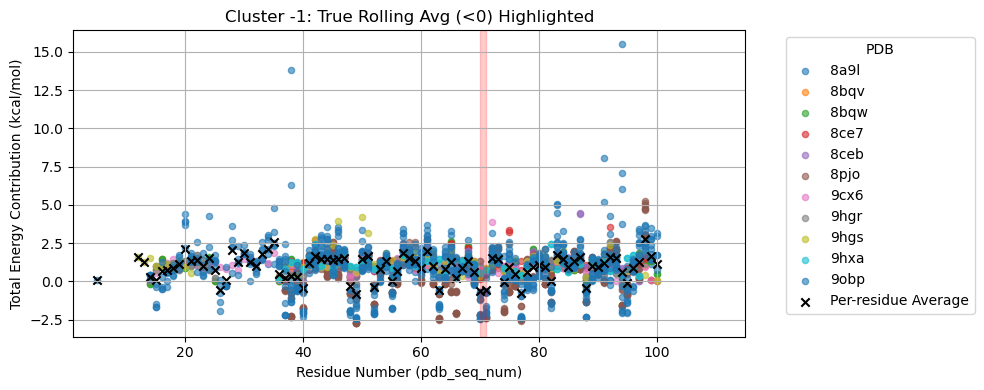

/tmp/ipykernel_3798011/3868382378.py:78: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


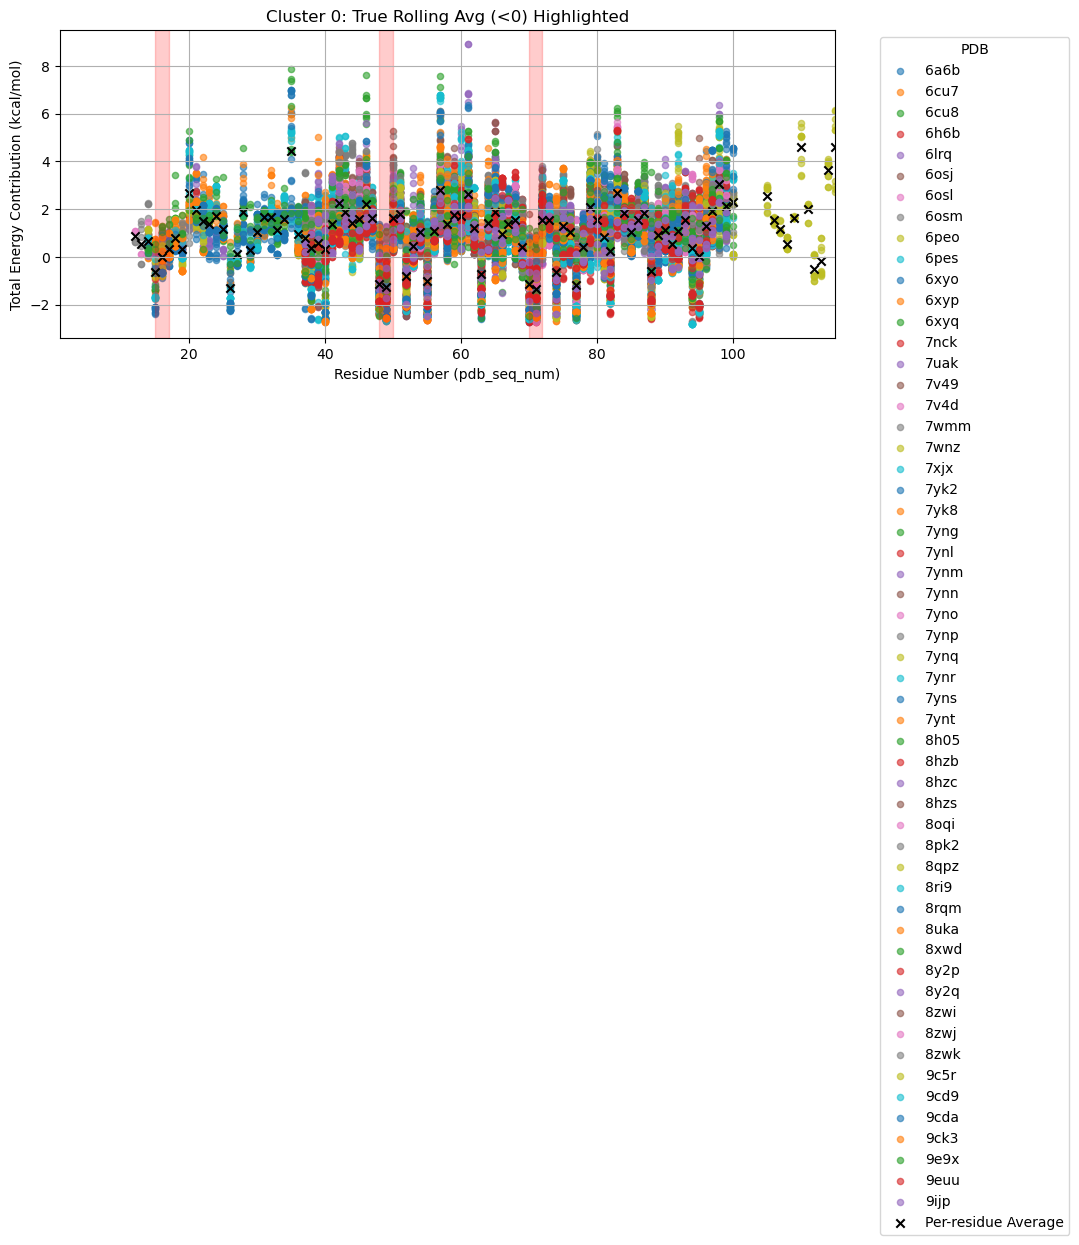

/tmp/ipykernel_3798011/3868382378.py:78: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


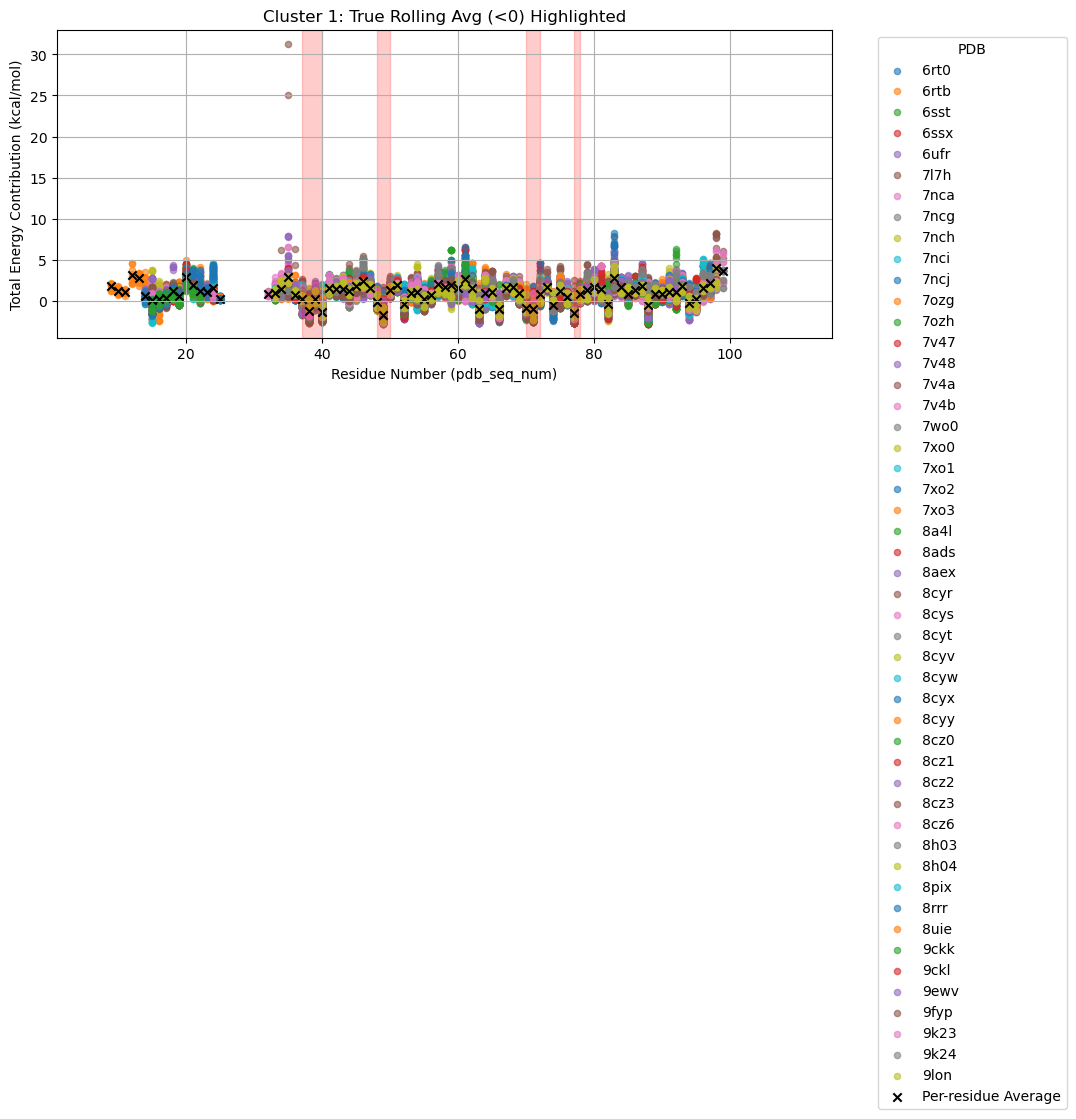

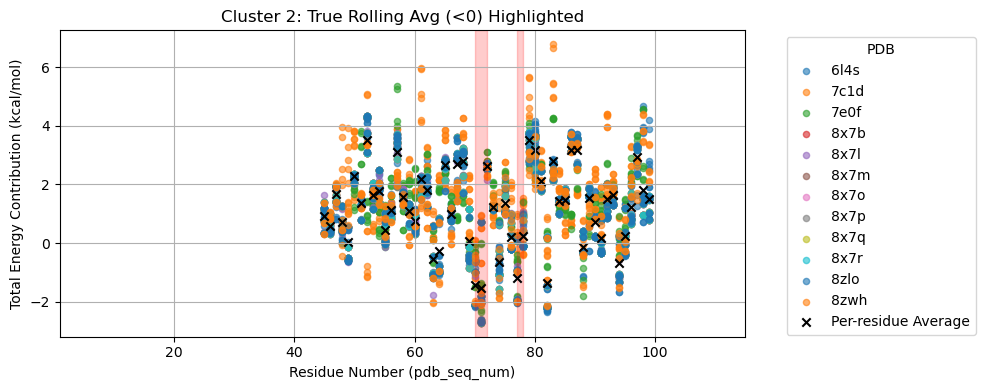

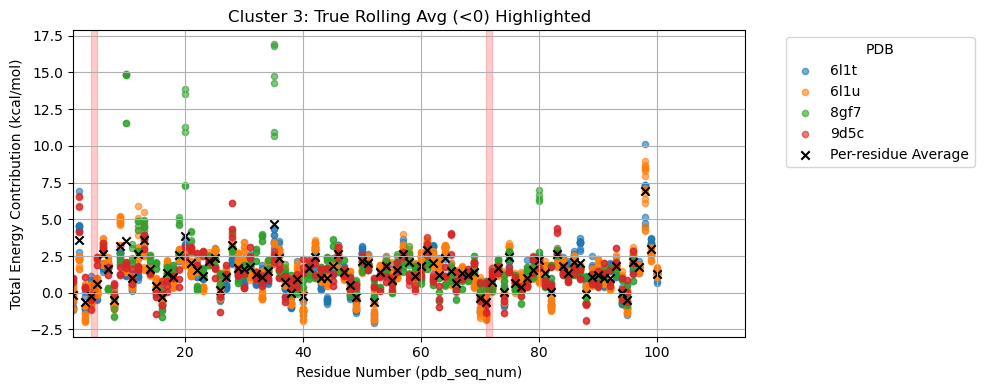

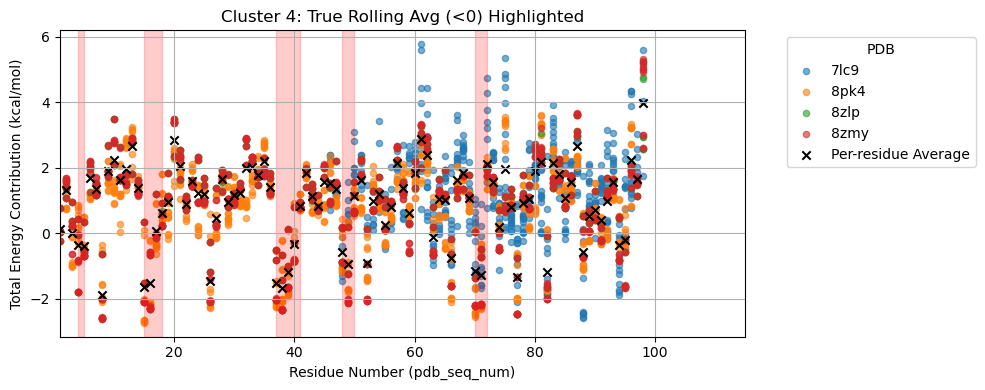

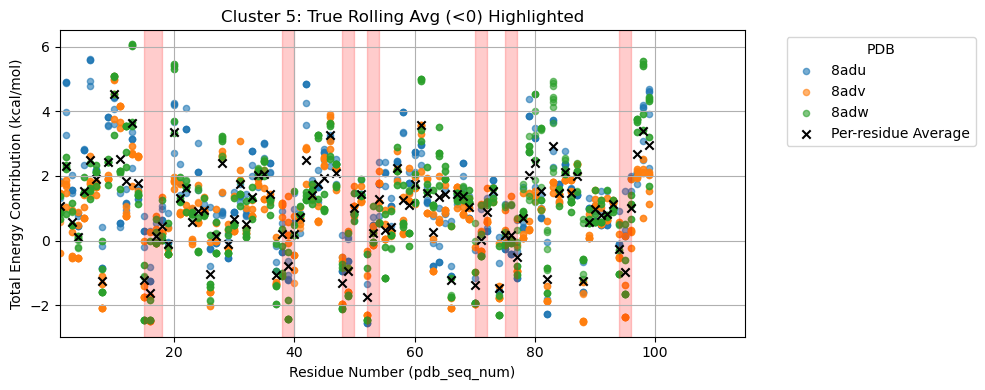

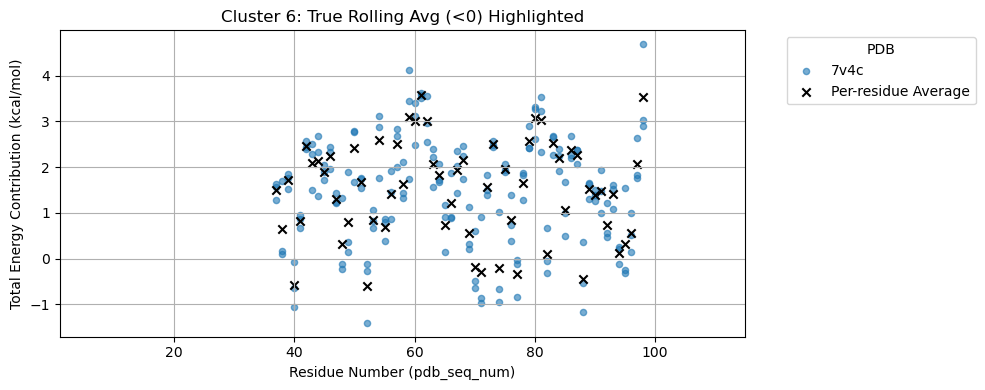

In [104]:
import numpy as np

# Remove gaps in pdb
combined_df = combined_df.dropna(subset=["pdb_seq_num"])

# Choose window size (must be odd for centering)
window_size = 3
half_window = window_size // 2

# Ensure pdb_seq_num is numeric
combined_df["pdb_seq_num"] = combined_df["pdb_seq_num"].astype(int)

# Get full sequence range
all_seq_nums = sorted(combined_df["pdb_seq_num"].unique())

# Now for each cluster
for cluster_id in sorted(combined_df["cluster"].unique()):
    cluster_df = combined_df[combined_df["cluster"] == cluster_id]

    if cluster_df.empty:
        continue

    # === Compute true rolling average of raw data ===
    rolling_values = []
    for res in all_seq_nums:
        window_range = range(res - half_window, res + half_window + 1)
        window_data = cluster_df[cluster_df["pdb_seq_num"].isin(window_range)]["total"]
        rolling_avg = window_data.mean() if not window_data.empty else np.nan
        rolling_values.append((res, rolling_avg))

    rolling_df = pd.DataFrame(rolling_values, columns=["pdb_seq_num", "rolling_avg"])

    # === Identify below-zero regions ===
    below_zero = rolling_df["rolling_avg"] < 0
    regions = []
    start = None
    for i in range(len(below_zero)):
        if below_zero.iloc[i] and start is None:
            start = rolling_df["pdb_seq_num"].iloc[i]
        elif not below_zero.iloc[i] and start is not None:
            end = rolling_df["pdb_seq_num"].iloc[i]
            regions.append((start, end))
            start = None
    if start is not None:
        end = rolling_df["pdb_seq_num"].iloc[-1]
        regions.append((start, end))

    # === Plotting ===
    plt.figure(figsize=(10, 4))

    # Plot structures
    for pdb, group in cluster_df.groupby("pdb_id"):
        plt.scatter(
            group["pdb_seq_num"], group["total"],
            label=pdb,
            alpha=0.6,
            s=20
        )

    # Highlight regions
    for start, end in regions:
        plt.axvspan(start, end, color='red', alpha=0.2)

    # Plot raw average per residue (optional)
    avg_df = cluster_df.groupby("pdb_seq_num")["total"].mean().reset_index()
    plt.scatter(
        avg_df["pdb_seq_num"], avg_df["total"],
        color="black", marker='x', label="Per-residue Average"
    )

    # Final formatting
    plt.title(f"Cluster {cluster_id}: True Rolling Avg (<0) Highlighted")
    plt.xlabel("Residue Number (pdb_seq_num)")
    plt.ylabel("Total Energy Contribution (kcal/mol)")
    plt.xlim(min(all_seq_nums), max(all_seq_nums))
    plt.legend(title="PDB", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [118]:
combined_df.head()

Pdb three_letter chain  \
0  /data/leuven/375/vsc37540/Projects/Amyloid/out...          VAL     A   
1  /data/leuven/375/vsc37540/Projects/Amyloid/out...          LEU     A   
2  /data/leuven/375/vsc37540/Projects/Amyloid/out...          TYR     A   
3  /data/leuven/375/vsc37540/Projects/Amyloid/out...          VAL     A   
4  /data/leuven/375/vsc37540/Projects/Amyloid/out...          GLY     A   

   pdb_seq_num     omega        phi      psi sec_struct     total  backHbond  \
0           37 -9999.000 -9999.0000  26.1796          *  0.893621  -0.253599   
1           38  -179.260   -70.2059 -48.0655          *  0.726625  -0.509753   
2           39   176.721    57.6679  63.9104          *  1.225130  -0.376898   
3           40   177.792   -74.2365 -41.3469          *  1.378510   0.000000   
4           41   179.274  -120.5800  47.2811          *  1.732010   0.000000   

   ...  entr_complex  Hetero Sidechain Hbond  Sidechain Accessibility  \
0  ...           0.0                     0.0                 0.065070   
1  ...           0.0                     0.0                 0.149728   
2  ...           0.0                     0.0                 0.328793   
3  ...           0.0                     0.0                 0.027668   
4  ...           0.0                     0.0                 0.000000   

   Mainchain Accessibility  Sidechain Contact Ratio  Mainchain Contact Ratio  \
0                 0.522100                  551.888                 1167.380   
1                 0.768075                  757.712                 1345.540   
2                 0.699591                 1834.110                 1300.530   
3                 0.439805                  528.960                 1110.100   
4                 0.307815                    0.000                  873.573   

   ab_index    source_file  pdb_id  cluster  
0       0.0  SD_6a6b.fxout    6a6b        0  
1       1.0  SD_6a6b.fxout    6a6b        0  
2       2.0  SD_6a6b.fxout    6a6b        0  
3       3.0  SD_6a6b.fxout    6a6b        0  
4       4.0  SD_6a6b.fxout    6a6b        0  

[5 rows x 40 columns]

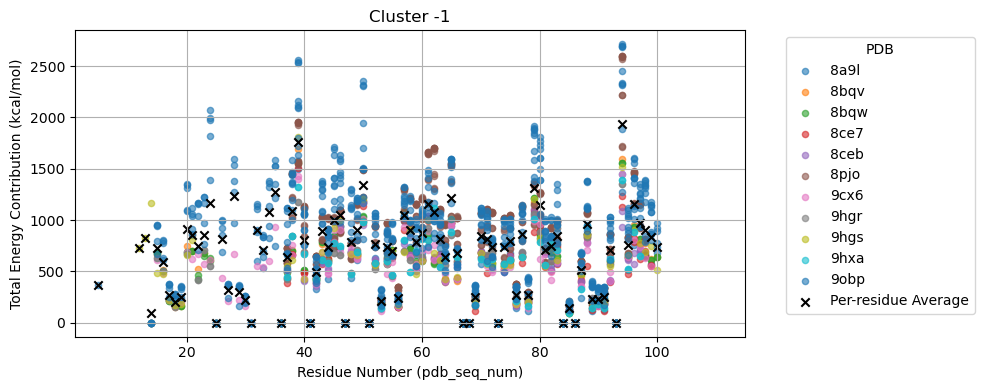

/tmp/ipykernel_3798011/1208490858.py:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


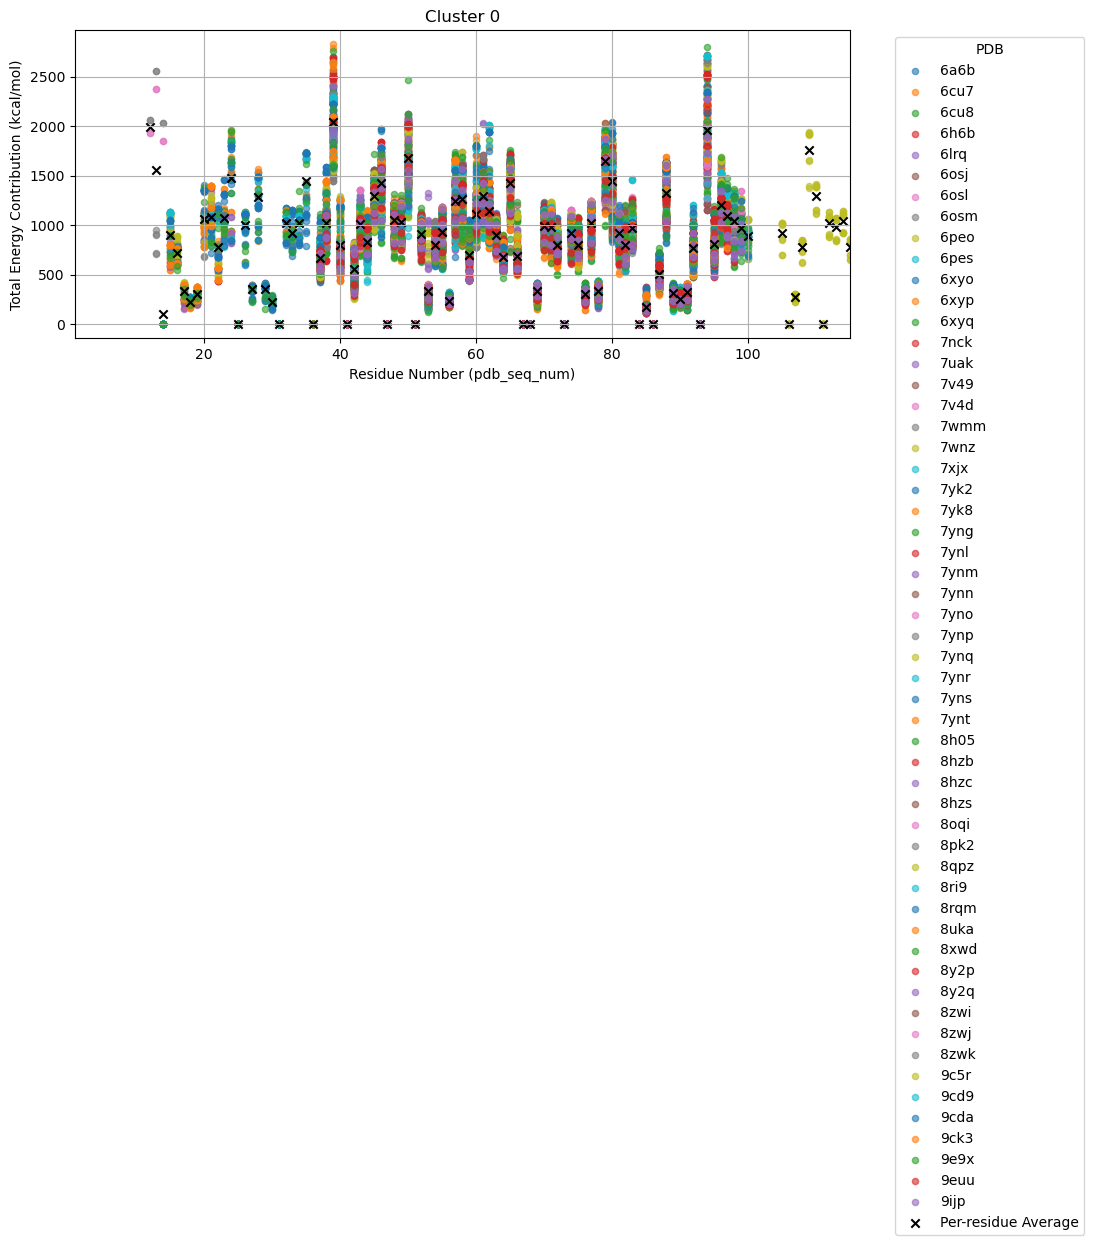

/tmp/ipykernel_3798011/1208490858.py:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


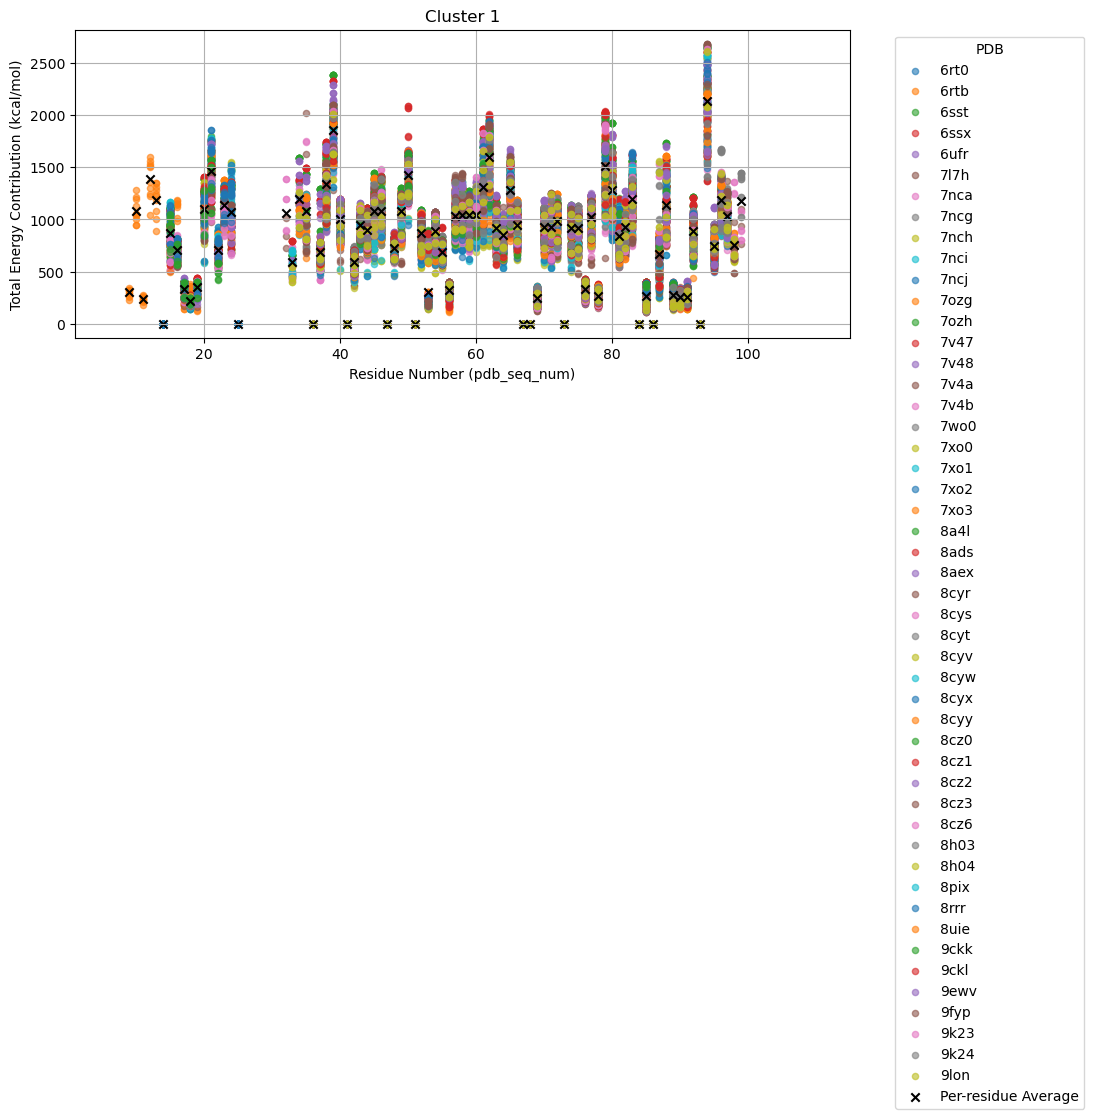

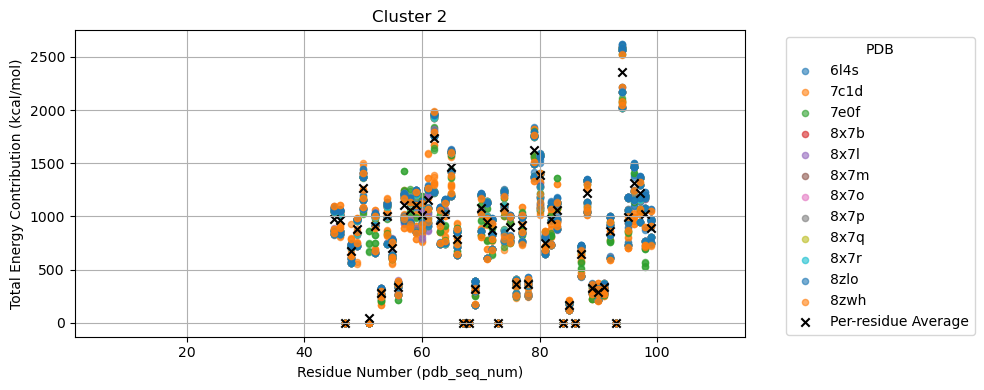

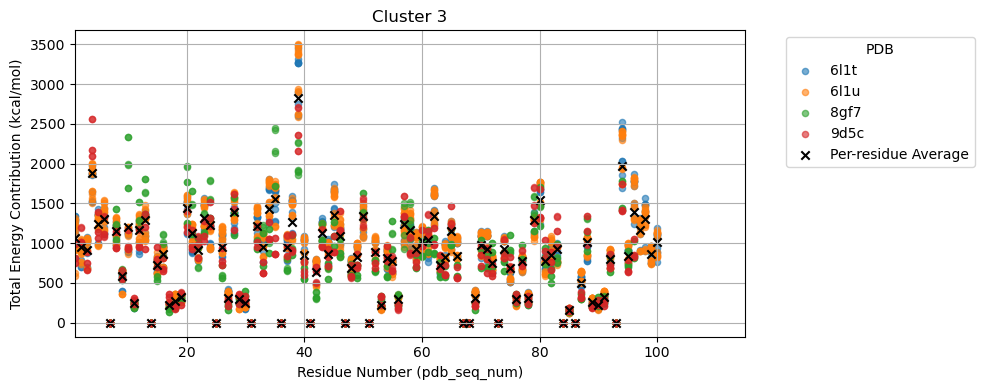

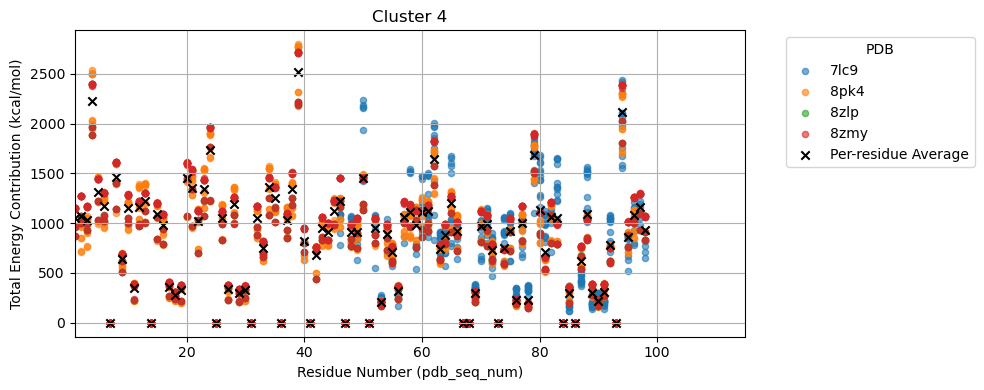

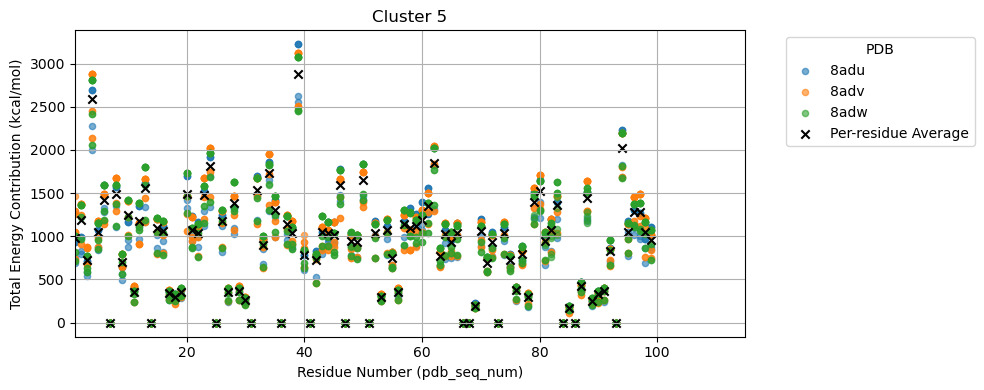

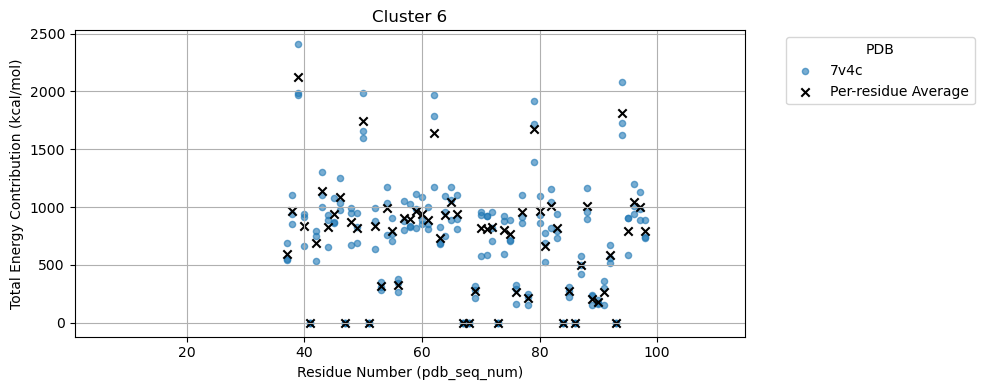

In [121]:
import numpy as np

# Remove gaps in pdb
combined_df = combined_df.dropna(subset=["pdb_seq_num"])

# Ensure pdb_seq_num is numeric
combined_df["pdb_seq_num"] = combined_df["pdb_seq_num"].astype(int)

# Get full sequence range
all_seq_nums = sorted(combined_df["pdb_seq_num"].unique())

# Now for each cluster
for cluster_id in sorted(combined_df["cluster"].unique()):
    cluster_df = combined_df[combined_df["cluster"] == cluster_id]

    if cluster_df.empty:
        continue

    # === Plotting ===
    plt.figure(figsize=(10, 4))

    # Plot structures
    for pdb, group in cluster_df.groupby("pdb_id"):
        plt.scatter(
            group["pdb_seq_num"], group["Sidechain Contact Ratio"],
            label=pdb,
            alpha=0.6,
            s=20
        )

    # Plot raw average per residue (optional)
    avg_df = cluster_df.groupby("pdb_seq_num")["Sidechain Contact Ratio"].mean().reset_index()
    plt.scatter(
        avg_df["pdb_seq_num"], avg_df["Sidechain Contact Ratio"],
        color="black", marker='x', label="Per-residue Average"
    )

    # Final formatting
    plt.title(f"Cluster {cluster_id}")
    plt.xlabel("Residue Number (pdb_seq_num)")
    plt.ylabel("Total Energy Contribution (kcal/mol)")
    plt.xlim(min(all_seq_nums), max(all_seq_nums))
    plt.legend(title="PDB", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Count number of atoms in each pdb to remove very short chains

In [3]:
import os
import glob
import pandas as pd

# Base folder
base_folder = "/data/leuven/375/vsc37540/Projects/Amyloid/output/protofilaments"

# Data collection
atom_counts = []

# Loop over all subdirectories
for subfolder in os.listdir(base_folder):
    subfolder_path = os.path.join(base_folder, subfolder)
    if not os.path.isdir(subfolder_path):
        continue  # Skip non-folders and cross_check

    # Find all .pdb files
    pdb_files = glob.glob(os.path.join(subfolder_path, "*.pdb"))

    for pdb_file in pdb_files:
        try:
            with open(pdb_file, "r") as f:
                lines = f.readlines()
                # Count lines starting with 'ATOM' (optionally include 'HETATM')
                num_atoms = sum(1 for line in lines if line.startswith("ATOM"))  # or line.startswith(("ATOM", "HETATM"))
        except Exception as e:
            print(f"Error reading {pdb_file}: {e}")
            num_atoms = None

        atom_counts.append({
            "subfolder": subfolder,
            "filename": os.path.basename(pdb_file),
            "num_atoms": num_atoms
        })

# Convert to DataFrame
df_atoms = pd.DataFrame(atom_counts)
df_atoms = df_atoms.sort_values(by="num_atoms", ascending=True)

# Save as CSV (optional)
df_atoms.to_csv("protofilament_atom_counts.csv", index=False)

# Show result
print(df_atoms)

      subfolder          filename  num_atoms
1722        syn        7yk8_4.pdb        240
1715        syn        7yk8_1.pdb        240
844      denovo        8gz8_8.pdb        258
845      denovo        8gz8_9.pdb        258
843      denovo        8gz8_7.pdb        258
...         ...               ...        ...
60          tau        8fug_1.pdb      13632
142         tau  7qjv_1_2_3_4.pdb      13860
453         tau  7qjx_1_2_3_4.pdb      13860
567   amyloid-β      9iio_1_2.pdb      23880
62          tau      8fug_1_2.pdb      26128

[1950 rows x 3 columns]
